## Consolidacion de archivos 

### Importacion de librerias y carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import sys
import re
import duckdb

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
## Primer archivo 2017-2025
df_desnutricion = pd.read_excel("../data/raw/DATA PROYECTO BREIT.xlsx", sheet_name="DESNUTRICION")
df_desarrollo = pd.read_excel("../data/raw/DATA PROYECTO BREIT.xlsx", sheet_name="DESARROLLO")
df_diccionario = pd.read_excel("../data/raw/DATA PROYECTO BREIT.xlsx", sheet_name="DICCIONARIO DE DATOS")

## Segundo archivo 2009-2016
df_desnutricion_old = pd.read_excel("../data/raw/DATA 2009-2016.xlsx", sheet_name="NUTRICION")
df_desarrollo_old = pd.read_excel("../data/raw/DATA 2009-2016.xlsx", sheet_name="DESARROLLO")

### Descripcion general de datasets

In [3]:
print("Shape df_desnutricion:", df_desnutricion.shape)
print("Shape df_desarrollo:", df_desarrollo.shape)
print("Shape df_diccionario:", df_diccionario.shape)
print("Shape df_desnutricion_old:", df_desnutricion_old.shape)
print("Shape df_desarrollo_old:", df_desarrollo_old.shape)

Shape df_desnutricion: (257178, 27)
Shape df_desarrollo: (257178, 18)
Shape df_diccionario: (35, 5)
Shape df_desnutricion_old: (197832, 28)
Shape df_desarrollo_old: (197832, 19)


In [4]:
df_desnutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257178 entries, 0 to 257177
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Fecha                   257178 non-null  datetime64[ns]
 1   Nº_HC                   257169 non-null  float64       
 2   Tipo_Paciente           257178 non-null  object        
 3   Categoría               257178 non-null  object        
 4   Sexo                    257178 non-null  object        
 5   Edad                    257178 non-null  object        
 6   Nº_Control              257177 non-null  float64       
 7   Peso                    257171 non-null  object        
 8   Talla                   257160 non-null  object        
 9   CabPC                   214658 non-null  object        
 10  Diag_Nacimiento         257178 non-null  object        
 11  P/T                     209486 non-null  object        
 12  T/E                     209489

In [5]:
df_desarrollo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257178 entries, 0 to 257177
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Fecha             257178 non-null  datetime64[ns]
 1   Nº_HC             257169 non-null  float64       
 2   Tipo_Paciente     257178 non-null  object        
 3   Categoría         257178 non-null  object        
 4   Sexo              257178 non-null  object        
 5   Edad              257178 non-null  object        
 6   Nº_Control        257177 non-null  float64       
 7   Peso              257171 non-null  object        
 8   Talla             257160 non-null  object        
 9   CabPC             214658 non-null  object        
 10  Diag_Nacimiento   257178 non-null  object        
 11  (M) - FG          244276 non-null  object        
 12  (M) - FF          126452 non-null  object        
 13  (C) - Cog         244273 non-null  object        
 14  (L) 

In [6]:
df_diccionario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nombre del campo  34 non-null     object
 1   Descripción       33 non-null     object
 2   Tipo de Dato      33 non-null     object
 3   Ejemplo           33 non-null     object
 4   Opciones válidas  33 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [7]:
## DICCIONARIO
df_diccionario.head(5)

,Nombre del campo,Descripción,Tipo de Dato,Ejemplo,Opciones válidas
0,Fecha,Fecha de atención,Fecha/Hora,2025-01-10 00:00:00,--
1,Nombre_Paciente,Nombre del niño(a) atendido(a),Texto Corto,Sanchez Diaz Madison Aurora,--
2,Nº_HC,Historia clínica asignada,Número,88025,--
3,Tipo_Paciente,Tipo de atención del paciente,Texto Corto,CRED,"CRED, Control RN"
4,Categoría,Continuidad del paciente en sus atenciones,Texto Corto,Continuador,"Nuevo, Continuador"


In [8]:
df_diccionario[df_diccionario['Nombre del campo'] == 'CabPC']

,Nombre del campo,Descripción,Tipo de Dato,Ejemplo,Opciones válidas
10,CabPC,Perimetro cefálico,Texto Corto,45.2,--


In [9]:
df_desnutricion_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197832 entries, 0 to 197831
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Fecha                   197832 non-null  datetime64[ns]
 1   Nombre_Paciente         197832 non-null  object        
 2   Nº_HC                   197809 non-null  float64       
 3   Tipo_Paciente           197832 non-null  object        
 4   Categoría               197832 non-null  object        
 5   Sexo                    197832 non-null  object        
 6   Edad                    197832 non-null  object        
 7   Nº_Control              197832 non-null  int64         
 8   Peso                    197830 non-null  object        
 9   Talla                   197827 non-null  object        
 10  CabPC                   63984 non-null   object        
 11  Diag_Nacimiento         197832 non-null  object        
 12  P/T                     197818

In [10]:
df_desarrollo_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197832 entries, 0 to 197831
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Fecha             197832 non-null  datetime64[ns]
 1   Nombre_Paciente   197832 non-null  object        
 2   Nº_HC             197737 non-null  float64       
 3   Tipo_Paciente     197832 non-null  object        
 4   Categoría         197832 non-null  object        
 5   Sexo              197832 non-null  object        
 6   Edad              197832 non-null  object        
 7   Nº_Control        197832 non-null  int64         
 8   Peso              197830 non-null  object        
 9   Talla             197827 non-null  object        
 10  CabPC             63984 non-null   object        
 11  Diag_Nacimiento   197832 non-null  object        
 12  (M) - FG          197440 non-null  object        
 13  (M) - FF          1 non-null       object        
 14  (C) 

In [11]:
df_desnutricion.head()

,Fecha,Nº_HC,Tipo_Paciente,Categoría,Sexo,Edad,Nº_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera
0,2019-05-09,84898.0,CRED,Continuador,F,2m,2.0,4.945,55,38.4,PTIN,+1,<-1,-1,GIP-GIT,Riesgo T/E,CN,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Papá,4
1,2019-06-07,84898.0,CRED,Continuador,F,3m,3.0,5.880,58.5,40,PTIN,+1,<-1,-1,GIP-GIT,Riesgo T/E,CA,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2
2,2019-07-09,84898.0,CRED,Continuador,F,4m,4.0,6.070,59.6,--,PTIN,+1,-2,<-1,GIP-GIT,Riesgo P/E,CA,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2
3,2019-08-07,84898.0,CRED,Continuador,F,5m,5.0,6.945,60.8,42.5,PTIN,>+1,<-2,-1,GAP-GIT,Riesgo T/E,CA,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2
4,2019-09-09,84898.0,CRED,Continuador,F,6m,6.0,7.705,63.1,43.4,PTIN,>+1,-2,-1,GAP-GIT,Riesgo T/E,CA,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2


In [12]:
df_desarrollo.head()

,Fecha,Nº_HC,Tipo_Paciente,Categoría,Sexo,Edad,Nº_Control,Peso,Talla,CabPC,Diag_Nacimiento,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,Acompaña_control,Enfermera
0,2019-05-09,84898.0,CRED,Continuador,F,2m,2.0,4.945,55,38.4,PTIN,EP,NaN,SI,SI,SI,Papá,4
1,2019-06-07,84898.0,CRED,Continuador,F,3m,3.0,5.880,58.5,40,PTIN,Recup,NaN,SI,SI,SI,Mamá,2
2,2019-07-09,84898.0,CRED,Continuador,F,4m,4.0,6.070,59.6,--,PTIN,SI,NaN,SI,SI,SI,Mamá,2
3,2019-08-07,84898.0,CRED,Continuador,F,5m,5.0,6.945,60.8,42.5,PTIN,SI,NaN,SI,SI,SI,Mamá,2
4,2019-09-09,84898.0,CRED,Continuador,F,6m,6.0,7.705,63.1,43.4,PTIN,SI,NaN,SI,SI,SI,Mamá,2


In [13]:
df_desnutricion_old.head()

,Fecha,Nombre_Paciente,Nº_HC,Tipo_Paciente,Categoría,Sexo,Edad,Nº_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera
0,2014-10-01,Abad Espinoza Lyam,57921.0,CRED,N,M,1m,1,4.180,53.4,37,Normal,+-1,+-1,-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3
1,2014-11-06,Abad Espinoza Lyam,57921.0,CRED,C,M,2m,2,5.530,57.6,38,Normal,+-1,+-1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8
2,2014-12-03,Abad Espinoza Lyam,57921.0,CRED,C,M,3m,3,6.320,61.2,39,Normal,+1,+1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2
3,2015-01-05,Abad Espinoza Lyam,57921.0,CRED,C,M,4m,4,7.090,64,39.5,Normal,+-1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2
4,2015-02-02,Abad Espinoza Lyam,57921.0,CRED,C,M,5m,5,7.610,66.1,NaN,Normal,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3


In [14]:
df_desarrollo_old.head()

,Fecha,Nombre_Paciente,Nº_HC,Tipo_Paciente,Categoría,Sexo,Edad,Nº_Control,Peso,Talla,CabPC,Diag_Nacimiento,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,Acompaña_control,Enfermera
0,2016-01-05,Abad Espinoza Lyam,57921.0,CRED,R Año Anter,M,1a4m,4,9.330,77.5,NaN,Normal,SI,NaN,SI,SI,EP,Mamá,7
1,2016-03-01,Abad Espinoza Lyam,57921.0,CRED,C,M,1a6m,5,9.610,79.5,NaN,Normal,SI,NaN,SI,SI,SI,Mamá,6
2,2016-12-20,Abad Espinoza Lyam,57921.0,CRED,C,M,2a4m,1,12.650,87.5,NaN,Normal,SI,NaN,SI,EP,EP,Mamá,3
3,2015-01-05,Abad Espinoza Lyam,57921.0,CRED,C,M,4m,4,7.090,64,39.5,Normal,SI,NaN,SI,SI,SI,Mamá,2
4,2015-02-02,Abad Espinoza Lyam,57921.0,CRED,C,M,5m,5,7.610,66.1,NaN,Normal,SI,NaN,SI,SI,SI,Mamá,3


### Tratamiento inicial para consolidacon de datasets

In [15]:
print("Shape df_desnutricion:", df_desnutricion.shape)
print("Shape df_desarrollo:", df_desarrollo.shape)

print("Shape df_desnutricion_old:", df_desnutricion_old.shape)
print("Shape df_desarrollo_old:", df_desarrollo_old.shape)

Shape df_desnutricion: (257178, 27)
Shape df_desarrollo: (257178, 18)
Shape df_desnutricion_old: (197832, 28)
Shape df_desarrollo_old: (197832, 19)


In [16]:
df_desnutricion.rename(columns={'Nº_HC': 'N_HC'}, inplace=True)
df_desnutricion.rename(columns={'Nº_Control': 'N_Control'}, inplace=True)
df_desnutricion_old.rename(columns={'Nº_HC': 'N_HC'}, inplace=True)
df_desnutricion_old.rename(columns={'Nº_Control': 'N_Control'}, inplace=True)

df_desarrollo.rename(columns={'Nº_HC': 'N_HC'}, inplace=True)
df_desarrollo.rename(columns={'Nº_Control': 'N_Control'}, inplace=True)
df_desarrollo_old.rename(columns={'Nº_HC': 'N_HC'}, inplace=True)
df_desarrollo_old.rename(columns={'Nº_Control': 'N_Control'}, inplace=True)

In [17]:
# Duplicados exactos
print("Duplicados en df_desnutricion:", df_desnutricion.duplicated().sum())
print("Duplicados en df_desarrollo:", df_desarrollo.duplicated().sum())

# Duplicados exactos
print("Duplicados en df_desnutricion:", df_desnutricion_old.duplicated().sum())
print("Duplicados en df_desarrollo:", df_desarrollo_old.duplicated().sum())

Duplicados en df_desnutricion: 12
Duplicados en df_desarrollo: 13
Duplicados en df_desnutricion: 14
Duplicados en df_desarrollo: 17


In [18]:
df_desarrollo[df_desarrollo.duplicated(keep=False)]

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,Acompaña_control,Enfermera
40428,2024-03-27,89854.0,CRED,Continuador,F,8m,7.0,8.940,68.5,43,Normal,EP,SI,SI,SI,SI,Mamá,2
40429,2024-03-27,89854.0,CRED,Continuador,F,8m,7.0,8.940,68.5,43,Normal,EP,SI,SI,SI,SI,Mamá,2
66811,2017-07-03,68053.0,CRED,Continuador,F,8m,8.0,8.950,69.5,NaN,PTIN,SI,NaN,SI,SI,SI,Mamá,5
66812,2017-07-03,68053.0,CRED,Continuador,F,8m,8.0,8.950,69.5,NaN,PTIN,SI,NaN,SI,SI,SI,Mamá,5
68512,2022-11-08,87289.0,Control RN,Continuador,F,22d,2.0,4.700,54.5,38,Normal,NaN,NaN,NaN,NaN,NaN,Ambos,0
68513,2022-11-08,87289.0,Control RN,Continuador,F,22d,2.0,4.700,54.5,38,Normal,NaN,NaN,NaN,NaN,NaN,Ambos,0
103409,2024-02-07,91801.0,Control RN,Continuador,F,22d,2.0,3.900,51.8,35.2,Normal,NaN,NaN,NaN,NaN,NaN,Mamá,0
103410,2024-02-07,91801.0,Control RN,Continuador,F,22d,2.0,3.900,51.8,35.2,Normal,NaN,NaN,NaN,NaN,NaN,Mamá,0
119236,2024-03-27,89714.0,CRED,Continuador,M,8m,8.0,8.730,69.9,45.5,Normal,EP,SI,SI,SI,SI,Mamá,2
119237,2024-03-27,89714.0,CRED,Continuador,M,8m,8.0,8.730,69.9,45.5,Normal,EP,SI,SI,SI,SI,Mamá,2


In [19]:
# Se eliminan registros duplicados exactos de ambos datasets y se resetea el index
df_desnutricion = df_desnutricion.drop_duplicates().reset_index(drop=True)
df_desarrollo   = df_desarrollo.drop_duplicates().reset_index(drop=True)

df_desnutricion_old = df_desnutricion_old.drop_duplicates().reset_index(drop=True)
df_desarrollo_old   = df_desarrollo_old.drop_duplicates().reset_index(drop=True)

print("Duplicados en df_desnutricion:", df_desnutricion.duplicated().sum())
print("Duplicados en df_desarrollo:", df_desarrollo.duplicated().sum())

print("Duplicados en df_desnutricion2:", df_desnutricion_old.duplicated().sum())
print("Duplicados en df_desarrollo2:", df_desarrollo_old.duplicated().sum())

Duplicados en df_desnutricion: 0
Duplicados en df_desarrollo: 0
Duplicados en df_desnutricion2: 0
Duplicados en df_desarrollo2: 0


### Corrigiendo NHC del dataset 2009-2016

TANI nos mencionó que habian pacientes en el dataset pre pandemia que no tenian NHC y que se les habia asignado por 0 o estaban registrados como nulos. Se procede a asignar un NHC unico a cada paciente que no lo tiene, empezando desde 15000

In [20]:
## CORRECCION EN DATASET OLD
def asignar_codigos_nhc(df, columna_nombre='Nombre_Paciente', columna_nhc='N_HC', codigo_inicial=13000):
    """
    Asigna códigos N_HC únicos a pacientes agrupados por nombre
    
    Parámetros:
    - df: DataFrame con los datos
    - columna_nombre: nombre de la columna que contiene los nombres
    - columna_nhc: nombre de la columna N_HC
    - codigo_inicial: código inicial para asignar (default 15000)
    """
    
    # Hacer una copia para no modificar el original
    df_copy = df.copy()
    
    # Filtrar registros con N_HC nulo O igual a 0, y que tengan nombre válido
    sin_codigo = df_copy[
        (df_copy[columna_nhc].isnull() | (df_copy[columna_nhc] == 0)) & 
        (df_copy[columna_nombre].notna()) & 
        (df_copy[columna_nombre] != '')
    ]
    
    print(f"Registros sin código N_HC (nulos o ceros) pero con nombre: {len(sin_codigo):,}")
    
    # Mostrar desglose
    nulos = df_copy[df_copy[columna_nhc].isnull() & df_copy[columna_nombre].notna() & (df_copy[columna_nombre] != '')]
    ceros = df_copy[(df_copy[columna_nhc] == 0) & df_copy[columna_nombre].notna() & (df_copy[columna_nombre] != '')]
    
    print(f"  - Registros con N_HC nulo: {len(nulos):,}")
    print(f"  - Registros con N_HC = 0: {len(ceros):,}")
    
    if len(sin_codigo) == 0:
        print("No hay registros para procesar")
        return df_copy
    
    # Obtener nombres únicos
    nombres_unicos = sin_codigo[columna_nombre].unique()
    print(f"Pacientes únicos sin código: {len(nombres_unicos):}")
    
    # Crear mapeo de nombre a nuevo código
    mapeo_codigos = {}
    codigo_actual = codigo_inicial
    
    for nombre in nombres_unicos:
        mapeo_codigos[nombre] = codigo_actual
        codigo_actual += 1
    
    # Aplicar los nuevos códigos (tanto para nulos como para ceros)
    for nombre, nuevo_codigo in mapeo_codigos.items():
        mask = (df_copy[columna_nhc].isnull() | (df_copy[columna_nhc] == 0)) & (df_copy[columna_nombre] == nombre)
        df_copy.loc[mask, columna_nhc] = nuevo_codigo
    
    # Mostrar resumen
    print(f"\n=== RESUMEN DE ASIGNACIÓN ===")
    print(f"Códigos asignados: {codigo_inicial} - {codigo_actual-1}")
    print(f"Total de pacientes procesados: {len(nombres_unicos):,}")
    print(f"Registros actualizados: {len(sin_codigo):,}")
    
    # Verificación final
    restantes_nulos = df_copy[columna_nhc].isnull().sum()
    restantes_ceros = (df_copy[columna_nhc] == 0).sum()
    print(f"N_HC nulos restantes: {restantes_nulos:,}")
    print(f"N_HC = 0 restantes: {restantes_ceros:,}")
    
    return df_copy, mapeo_codigos

In [21]:
df_desnutricion_old[df_desnutricion_old['N_HC'] == 0]['Nombre_Paciente'].value_counts()

Nombre_Paciente
Ojeda Pari Alejandra                   11
Robles Cama Maybet                     10
Fernandez Reyes Angel Misael           10
Rodríguez Calle Enma                    8
Tello Atoco Diego                       6
Acuña Cordova Kimberly                  5
Idelfonso Soto Maria                    4
Chacon Tasaico Alizee                   4
Silva Quinta Tracy                      4
Regino Casas Maryorie                   4
Huaman Herrera Matias                   3
Quispe Roque Lucia                      3
Huamancayo Carril Maria Liz             3
Rojas Carrizales Isai                   3
Alvarez Martinez Ezequiel               3
Sanchez Garay Luis Rodrigo              3
Padilla León Elias                      3
Quispe Perez Manuel                     2
Pituy Pinedo Celia                      2
Valdivia Castillo Cristina              2
Vergara Cervantes Luis                  2
Orrego Camposano Luis Fernando          2
Sante Noblejas Maximo                   1
Sarmientos Mosquer

In [22]:
df_desarrollo_old[df_desarrollo_old['N_HC'] == 0]['Nombre_Paciente'].value_counts()

Nombre_Paciente
Fernandez Reyes Angel Misael           10
Acuña Cordova Kimberly                  5
Chacon Tasaico Alizee                   4
Idelfonso Soto Maria                    4
Alvarez Martinez Ezequiel               3
Huaman Herrera Matias                   3
Huamancayo Carril Maria Liz             3
Valdivia Castillo Cristina              2
Farfan Huaman Xiomara K                 1
Fernandez Dueñas Dafne                  1
Lopez Huaman Eileen                     1
Sarmientos Mosquera Alberto Enrique     1
Name: count, dtype: int64

In [23]:
# Se escoge el dataset de nutricion porque tiene mas registros
df_desnutricion_old, mapeo = asignar_codigos_nhc(df_desnutricion_old, 'Nombre_Paciente', 'N_HC', 15000)

Registros sin código N_HC (nulos o ceros) pero con nombre: 133
  - Registros con N_HC nulo: 23
  - Registros con N_HC = 0: 110
Pacientes únicos sin código: 43

=== RESUMEN DE ASIGNACIÓN ===
Códigos asignados: 15000 - 15042
Total de pacientes procesados: 43
Registros actualizados: 133
N_HC nulos restantes: 0
N_HC = 0 restantes: 0


In [24]:
df_desnutricion_old.head()

,Fecha,Nombre_Paciente,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera
0,2014-10-01,Abad Espinoza Lyam,57921.0,CRED,N,M,1m,1,4.180,53.4,37,Normal,+-1,+-1,-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3
1,2014-11-06,Abad Espinoza Lyam,57921.0,CRED,C,M,2m,2,5.530,57.6,38,Normal,+-1,+-1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8
2,2014-12-03,Abad Espinoza Lyam,57921.0,CRED,C,M,3m,3,6.320,61.2,39,Normal,+1,+1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2
3,2015-01-05,Abad Espinoza Lyam,57921.0,CRED,C,M,4m,4,7.090,64,39.5,Normal,+-1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2
4,2015-02-02,Abad Espinoza Lyam,57921.0,CRED,C,M,5m,5,7.610,66.1,NaN,Normal,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3


Deteccion de casos de duplicados con variaciones en registros. Ejemplo: Mismo paciente y con misma fecha pero con diferente registro de peso

In [25]:
print("DATASET ANTIGUO")
# DUPLICADOS POR LLAVES (no solo registros exactos)
keys = ['Fecha', 'Nombre_Paciente', 'Tipo_Paciente','N_Control']

print("Registros df_desnutricion:", df_desnutricion_old.shape)
print("Registros df_desarrollo:",   df_desarrollo_old.shape)

# En df_desnutricion
dups_desnutricion_old = df_desnutricion_old[df_desnutricion_old.duplicated(subset=keys, keep=False)]
print(f"Duplicados en df_desnutricion: {dups_desnutricion_old.shape[0]}")

# En df_desarrollo
dups_desarrollo_old = df_desarrollo_old[df_desarrollo_old.duplicated(subset=keys, keep=False)]
print(f"Duplicados en df_desarrollo: {dups_desarrollo_old.shape[0]}")

DATASET ANTIGUO
Registros df_desnutricion: (197818, 28)
Registros df_desarrollo: (197815, 19)
Duplicados en df_desnutricion: 50
Duplicados en df_desarrollo: 44


In [26]:
print("DATASET MAS RECIENTE")
# DUPLICADOS POR LLAVES (no solo registros exactos)
keys = ['Fecha', 'N_HC', 'Tipo_Paciente','N_Control']

print("Registros df_desnutricion:", df_desnutricion.shape)
print("Registros df_desarrollo:",   df_desarrollo.shape)

# En df_desnutricion
dups_desnutricion = df_desnutricion[df_desnutricion.duplicated(subset=keys, keep=False)]
print(f"Duplicados en df_desnutricion: {dups_desnutricion.shape[0]}")

# En df_desarrollo
dups_desarrollo = df_desarrollo[df_desarrollo.duplicated(subset=keys, keep=False)]
print(f"Duplicados en df_desarrollo: {dups_desarrollo.shape[0]}")

DATASET MAS RECIENTE
Registros df_desnutricion: (257166, 27)
Registros df_desarrollo: (257165, 18)
Duplicados en df_desnutricion: 32
Duplicados en df_desarrollo: 30


In [27]:
dups_desnutricion_old.sort_values('N_HC').head(8)

,Fecha,Nombre_Paciente,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera
83973,2015-01-17,Huamani Arana María de los Angeles,42492.0,CRED,C,F,4a,1,15.750,98.2,NaN,PTIN,+1,<-1,-1,GIP-GIT,Riesgo T/E,CA,Fav,NaN,NaN,NaN,SI,NaN,NaN,NaN,Mamá,2
83972,2015-01-17,Huamani Arana María de los Angeles,42492.0,CRED,C,F,4a,1,15.750,98.2,NaN,PTIN,+1,<-1,-1,GIP-GIT,Riesgo T/E,CA,Desf,NaN,NaN,NaN,SI,NaN,NaN,NaN,Mamá,2
184671,2012-02-07,Valle Medina Dayiro Jhanyol,44027.0,CRED,C,M,9m,9,8.700,70.5,NaN,Prétermino,+1,+-1,+1,GIP-GIT,Normal,NE,Fav,NaN,NaN,NaN,Si,NaN,NaN,NaN,Mamá,1
184670,2012-02-07,Valle Medina Dayiro Jhanyol,44027.0,CRED,C,M,9m,9,7.600,67.3,NaN,Prétermino,-1,<-1,-1,GAP-GIT,Riesgo T/E,CA,Fav,NaN,NaN,NaN,Si,NaN,NaN,NaN,Mamá,1
184668,2011-12-09,Valle Medina Dayiro Jhanyol,44027.0,CRED,C,M,7m,7,8.220,67,NaN,Prétermino,+1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,NaN,NaN,Si,NaN,NaN,NaN,Mamá,1
184667,2011-12-09,Valle Medina Dayiro Jhanyol,44027.0,CRED,C,M,7m,7,7.000,64,NaN,Prétermino,+1,<-1,-1,GAP-GAT,Riesgo T/E,CA,Fav,NaN,NaN,NaN,Si,NaN,NaN,NaN,Mamá,1
147474,2012-01-17,Ramos Herrera Jorge Josue,45259.0,CRED,C,M,4m,5,6.370,62.3,41.3,BPN,-1,-1,-1,GAP-GAT,Riesgo P/E,CA,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,6
147475,2012-01-17,Ramos Herrera Jorge Josue,45259.0,CRED,C,M,4m,5,6.350,61.6,40.3,BPN,-1,-1,-1,GAP-GIT,Riesgo P/E,CA,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,6


In [28]:
dups_desnutricion.sort_values('N_HC').head(8)

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera
148127,2017-02-24,60235.0,CRED,Continuador,F,2a,1.0,13.440,83.6,NaN,Normal,>+2,<-1,+1,GIP-GIT,Riesgo T/E,CN,Desf,NaN,NaN,NaN,NO,NaN,NaN,NaN,Mamá,2
140019,2017-02-24,60235.0,CRED,Continuador,F,2a,1.0,12.320,81.2,NaN,Normal,>+1,-2,+1,GAP-GIT,Riesgo T/E,CA,Desf,NaN,NaN,NaN,SI,NaN,NaN,NaN,Mamá,2
181651,2017-09-13,63828.0,CRED,Continuador,M,2a,1.0,12.600,81.9,NaN,Prétermino,>+1,<-1,+1,GAP-GIT,Riesgo T/E,CA,Desf,NaN,NaN,NaN,SI,NaN,NaN,NaN,Mamá,2
181650,2017-09-13,63828.0,CRED,Continuador,M,2a,1.0,12.400,81.4,NaN,Prétermino,>+1,<-1,+1,GIP-GIT,Riesgo T/E,CA,Desf,NaN,NaN,NaN,NO,NaN,NaN,NaN,Mamá,2
196927,2017-09-25,67002.0,CRED,Continuador,F,1a4m,3.0,10.120,77.7,NaN,Prétermino,+1,-1,-1,GAP-GAT,Riesgo P/E,CA,Fav,NaN,NaN,NaN,NO,NaN,NaN,NaN,Mamá,7
196926,2017-09-25,67002.0,CRED,Continuador,F,1a4m,3.0,10.340,77.1,NaN,Prétermino,+1,-1,+-1,GAP-GAT,Normal,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,Mamá,7
189640,2017-04-03,68614.0,CRED,Continuador,M,3m,3.0,7.140,61.6,42,Normal,>+1,+1,+1,GAP-GIT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2
189639,2017-04-03,68614.0,CRED,Continuador,M,3m,3.0,6.025,58.4,39.5,Normal,+1,<-1,-1,GIP-GIT,Riesgo T/E,CN,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2


In [29]:
dups_desarrollo_old.sort_values('N_HC').head(8)

,Fecha,Nombre_Paciente,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,Acompaña_control,Enfermera
184672,2011-12-09,Valle Medina Dayiro Jhanyol,44027.0,CRED,C,M,7m,7,8.220,67,NaN,Prétermino,Recup,NaN,SI,SI,SI,Mamá,1
184671,2011-12-09,Valle Medina Dayiro Jhanyol,44027.0,CRED,C,M,7m,7,7.000,64,NaN,Prétermino,Recup,NaN,SI,SI,SI,Mamá,1
184660,2012-02-07,Valle Medina Dayiro Jhanyol,44027.0,CRED,C,M,9m,9,7.600,67.3,NaN,Prétermino,SI,NaN,SI,SI,SI,Mamá,1
184659,2012-02-07,Valle Medina Dayiro Jhanyol,44027.0,CRED,C,M,9m,9,8.700,70.5,NaN,Prétermino,Recup,NaN,SI,SI,SI,Mamá,1
147486,2012-01-17,Ramos Herrera Jorge Josue,45259.0,CRED,C,M,4m,5,6.370,62.3,41.3,BPN,SI,NaN,SI,SI,SI,Mamá,6
147487,2012-01-17,Ramos Herrera Jorge Josue,45259.0,CRED,C,M,4m,5,6.350,61.6,40.3,BPN,SI,NaN,SI,SI,SI,Mamá,6
183501,2015-06-20,Valdivia Diaz Matias,46925.0,CRED,C,M,3a4m,3,16.700,100.4,NaN,PTIN,SI,NaN,SI,SI,SI,Mamá,7
183502,2015-06-20,Valdivia Diaz Matias,46925.0,CRED,C,M,3a4m,3,16.700,100.4,NaN,PTIN,SI,NaN,SI,SI,SI,Mamá,5


In [30]:
dups_desarrollo.sort_values('N_HC').head(8)

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,Acompaña_control,Enfermera
148127,2017-02-24,60235.0,CRED,Continuador,F,2a,1.0,13.440,83.6,NaN,Normal,SI,NaN,SI,SI,SI,Mamá,2
140019,2017-02-24,60235.0,CRED,Continuador,F,2a,1.0,12.320,81.2,NaN,Normal,SI,NaN,SI,SI,SI,Mamá,2
181651,2017-09-13,63828.0,CRED,Continuador,M,2a,1.0,12.600,81.9,NaN,Prétermino,SI,NaN,SI,SI,SI,Mamá,2
181650,2017-09-13,63828.0,CRED,Continuador,M,2a,1.0,12.400,81.4,NaN,Prétermino,SI,NaN,SI,SI,SI,Mamá,2
196927,2017-09-25,67002.0,CRED,Continuador,F,1a4m,3.0,10.120,77.7,NaN,Prétermino,Recup,NaN,SI,SI,SI,Mamá,7
196926,2017-09-25,67002.0,CRED,Continuador,F,1a4m,3.0,10.340,77.1,NaN,Prétermino,EP,NaN,SI,SI,SI,Mamá,7
189640,2017-04-03,68614.0,CRED,Continuador,M,3m,3.0,7.140,61.6,42,Normal,SI,NaN,SI,SI,SI,Mamá,2
189639,2017-04-03,68614.0,CRED,Continuador,M,3m,3.0,6.025,58.4,39.5,Normal,EP,NaN,SI,SI,SI,Mamá,2


In [31]:
## SE GUARDARAN LOS CASOS ENCONTRADOS PARA VALIDACION CON LA ORGANIZACION
dups_desnutricion_old.to_csv('../data/intermediate/TANI_nutricion_casos_duplicados_base_pre_2017.csv',sep=";")
dups_desarrollo_old.to_csv('../data/intermediate/TANI_desarrollo_casos_duplicados_base_pre_2017.csv',sep=";")
dups_desnutricion.to_csv('../data/intermediate/TANI_nutricion_casos_duplicados_base_actual_2017_2025.csv',sep=";")
dups_desarrollo.to_csv('../data/intermediate/TANI_desarrollo_casos_duplicados_base_actual_2017_2025.csv',sep=";")

Se observan registros duplicados con la principal diferencia en los campos numericos (peso, talla, etc). Lo que evidencia un posible mal registro de datos en la digitalizacion de las HC.

In [32]:
keys = ['Fecha', 'Nombre_Paciente', 'Tipo_Paciente','N_Control']

mask_dup_desnut_old = df_desnutricion_old.duplicated(subset=keys, keep=False)
mask_dup_desarr_old = df_desarrollo_old.duplicated(subset=keys, keep=False)

df_desnutricion_uniques_old = df_desnutricion_old[~mask_dup_desnut_old].copy()
df_desarrollo_uniques_old   = df_desarrollo_old[~mask_dup_desarr_old].copy()

print("Duplicados en df_desnutricion:", int(mask_dup_desnut_old.sum()))
print("Duplicados en df_desarrollo:",   int(mask_dup_desarr_old.sum()))

print("Filas únicas df_desnutricion:", df_desnutricion_uniques_old.shape)
print("Filas únicas df_desarrollo:",   df_desarrollo_uniques_old.shape)


Duplicados en df_desnutricion: 50
Duplicados en df_desarrollo: 44
Filas únicas df_desnutricion: (197768, 28)
Filas únicas df_desarrollo: (197771, 19)


In [33]:
keys = ['Fecha', 'N_HC', 'Tipo_Paciente','N_Control']

mask_dup_desnut = df_desnutricion.duplicated(subset=keys, keep=False)
mask_dup_desarr = df_desarrollo.duplicated(subset=keys, keep=False)

df_desnutricion_uniques = df_desnutricion[~mask_dup_desnut].copy()
df_desarrollo_uniques   = df_desarrollo[~mask_dup_desarr].copy()

print("Duplicados en df_desnutricion:", int(mask_dup_desnut.sum()))
print("Duplicados en df_desarrollo:",   int(mask_dup_desarr.sum()))

print("Filas únicas df_desnutricion:", df_desnutricion_uniques.shape)
print("Filas únicas df_desarrollo:",   df_desarrollo_uniques.shape)


Duplicados en df_desnutricion: 32
Duplicados en df_desarrollo: 30
Filas únicas df_desnutricion: (257134, 27)
Filas únicas df_desarrollo: (257135, 18)


Se separan los casos encontrados antes de realizar el merge entre bases

In [34]:
cols_desarrollo_old = ['Fecha', 'Nombre_Paciente', 'N_Control','Tipo_Paciente', '(M) - FG', '(M) - FF', '(C) - Cog','(L) - Len','(S) - Soc']
df_desarrollo_reducido_uniques_old = df_desarrollo_uniques_old[cols_desarrollo_old]

In [35]:
# Merge datasets pre 2017
df_consolidado_old = df_desnutricion_uniques_old.merge(
    df_desarrollo_reducido_uniques_old,
    how='inner',
    on=['Fecha', 'Nombre_Paciente', 'Tipo_Paciente','N_Control']
)

In [36]:
df_consolidado_old.head()

,Fecha,Nombre_Paciente,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc
0,2014-10-01,Abad Espinoza Lyam,57921.0,CRED,N,M,1m,1,4.180,53.4,37,Normal,+-1,+-1,-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI
1,2014-11-06,Abad Espinoza Lyam,57921.0,CRED,C,M,2m,2,5.530,57.6,38,Normal,+-1,+-1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8,EP,NaN,SI,SI,SI
2,2014-12-03,Abad Espinoza Lyam,57921.0,CRED,C,M,3m,3,6.320,61.2,39,Normal,+1,+1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,Recup,NaN,SI,SI,SI
3,2015-01-05,Abad Espinoza Lyam,57921.0,CRED,C,M,4m,4,7.090,64,39.5,Normal,+-1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI
4,2015-02-02,Abad Espinoza Lyam,57921.0,CRED,C,M,5m,5,7.610,66.1,NaN,Normal,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI


In [37]:
df_consolidado_old.shape

(197768, 33)

In [38]:
cols_desarrollo = ['Fecha', 'N_HC', 'N_Control','Tipo_Paciente', '(M) - FG', '(M) - FF', '(C) - Cog','(L) - Len','(S) - Soc']
df_desarrollo_reducido_uniques = df_desarrollo_uniques[cols_desarrollo]

In [39]:
## MERGE DATASET RECIENTE
df_consolidado = df_desnutricion_uniques.merge(
    df_desarrollo_reducido_uniques,
    how='inner',  # o 'inner' si quieres solo los que tienen match en ambos
    on=['Fecha', 'N_HC', 'Tipo_Paciente','N_Control']
)

In [40]:
df_consolidado.head()

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc
0,2019-05-09,84898.0,CRED,Continuador,F,2m,2.0,4.945,55,38.4,PTIN,+1,<-1,-1,GIP-GIT,Riesgo T/E,CN,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Papá,4,EP,NaN,SI,SI,SI
1,2019-06-07,84898.0,CRED,Continuador,F,3m,3.0,5.880,58.5,40,PTIN,+1,<-1,-1,GIP-GIT,Riesgo T/E,CA,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,Recup,NaN,SI,SI,SI
2,2019-07-09,84898.0,CRED,Continuador,F,4m,4.0,6.070,59.6,--,PTIN,+1,-2,<-1,GIP-GIT,Riesgo P/E,CA,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI
3,2019-08-07,84898.0,CRED,Continuador,F,5m,5.0,6.945,60.8,42.5,PTIN,>+1,<-2,-1,GAP-GIT,Riesgo T/E,CA,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI
4,2019-09-09,84898.0,CRED,Continuador,F,6m,6.0,7.705,63.1,43.4,PTIN,>+1,-2,-1,GAP-GIT,Riesgo T/E,CA,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI


In [41]:
df_consolidado.shape

(257133, 32)

In [42]:
df_consolidado_old.sort_values('N_HC')

,Fecha,Nombre_Paciente,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc
178770,2010-10-14,Tomaylla Denegri Leonel,3340.0,CRED,C,M,1a9m,2,11.200,83,NaN,Normal,+1,-1,-1,GIP-GIT,Normal,NE,Fav,NaN,NaN,NaN,No,NaN,NaN,NaN,Mamá,6,SI,NaN,SI,SI,EP
178771,2011-01-12,Tomaylla Denegri Leonel,3340.0,CRED,C,M,1a11m,3,12.000,84.6,NaN,Normal,+1,-1,+-1,GIP-GIT,Normal,NE,Fav,NaN,NaN,NaN,No,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,EP
174988,2010-09-07,Taparaco Pocco Maycol,3780.0,CRED,C,M,8m,7,7.850,70.5,NaN,Normal,-1,+1,-1,GIP-GIT,Riesgo P/E,CA,Desf,NaN,NaN,NaN,No,NaN,NaN,NaN,Mamá,1,SI,NaN,SI,SI,SI
174991,2010-12-10,Taparaco Pocco Maycol,3780.0,CRED,C,M,11m,10,9.150,77,NaN,Normal,-1,>+1,-1,GAP-GIT,Riesgo P/T,CA,Fav,NaN,NaN,NaN,Si,NaN,NaN,NaN,Mamá,6,SI,NaN,SI,SI,SI
174992,2011-01-07,Taparaco Pocco Maycol,3780.0,CRED,C,M,1a,1,9.150,79,NaN,Normal,<-1,>+1,-1,GIP-GAT,Riesgo P/T,CA,Desf,NaN,NaN,NaN,Si,NaN,NaN,NaN,Mamá,6,SI,NaN,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20702,2013-01-02,Benavente Pinares Dann,83048.0,CRED,C,M,4m,3,8.350,64.7,42.9,Normal,>+1,+1,>+1,GAP-GAT,Normal,NE,Norm,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8,SI,NaN,SI,SI,SI
20701,2012-12-04,Benavente Pinares Dann,83048.0,CRED,C,M,3m,2,7.850,62,41.5,Normal,>+2,+1,+2,GAP-GIT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,7,Recup,NaN,SI,SI,SI
20709,2013-11-06,Benavente Pinares Dann,83048.0,CRED,C,M,1a2m,2,12.050,80,NaN,Normal,>+1,+1,>+1,GAP-GAT,Normal,NE,Fav,NaN,NaN,NaN,Si,NaN,NaN,NaN,Mamá,7,SI,NaN,SI,SI,SI
20708,2013-09-06,Benavente Pinares Dann,83048.0,CRED,C,M,1a,1,11.470,77.5,NaN,Normal,>+1,+1,>+1,GIP-GAT,Normal,NE,Fav,NaN,NaN,NaN,Si,NaN,NaN,NaN,Mamá,7,SI,NaN,SI,SI,SI


In [43]:
df_consolidado_old.columns

Index(['Fecha', 'Nombre_Paciente', 'N_HC', 'Tipo_Paciente', 'Categoría',
       'Sexo', 'Edad', 'N_Control', 'Peso', 'Talla', 'CabPC',
       'Diag_Nacimiento', 'P/T', 'T/E', 'P/E', 'Ganancia_Peso_Talla',
       'Dx_Nutricional', 'CN-CA', 'Mantiene_Diag_Fav/Desf', 'Recuperado',
       'Lactancia', 'Razón', 'ACA', 'Tam_para', 'Tam_graha', 'Tam_hb',
       'Acompaña_control', 'Enfermera', '(M) - FG', '(M) - FF', '(C) - Cog',
       '(L) - Len', '(S) - Soc'],
      dtype='object')

In [44]:
df_consolidado_nhc_nulos = df_consolidado[df_consolidado['N_HC'].isnull()]
df_consolidado_nhc_nulos

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc
84530,2017-10-12,NaN,CRED,Nuevo,F,29d,1.0,3.660,50.7,35.9,Prétermino,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,6,EP,NaN,SI,SI,SI
84531,2017-11-13,NaN,CRED,Continuador,F,2m,2.0,4.925,55.6,38.7,Prétermino,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,6,EP,NaN,SI,SI,SI
84532,2017-12-12,NaN,CRED,Continuador,F,3m,3.0,5.635,58.5,39.8,Prétermino,+1,+1,+1,GIP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,6,EP,NaN,SI,SI,SI
84533,2018-01-11,NaN,CRED,Continuador,F,4m,4.0,6.250,61,41,Prétermino,+1,+1,-1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,6,Recup,NaN,SI,SI,SI
84534,2018-02-12,NaN,CRED,Continuador,F,5m,5.0,6.980,63.8,42.2,Prétermino,+1,+-1,-1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,6,SI,NaN,SI,SI,SI
84535,2018-04-11,NaN,CRED,Continuador,F,7m,6.0,7.930,65.7,43.9,Prétermino,+1,-1,-1,GAP-GAT,Normal,NaN,NaN,NaN,NaN,NaN,SI,NaN,NaN,NaN,Mamá,6,SI,NaN,SI,SI,SI
84536,2018-05-10,NaN,CRED,Continuador,F,8m,7.0,8.235,67.5,44.8,Prétermino,+1,-1,+-1,GAP-GAT,Normal,NaN,NaN,NaN,NaN,NaN,SI,NaN,NaN,NaN,Mamá,6,SI,NaN,SI,SI,SI
84537,2018-06-12,NaN,CRED,Continuador,F,9m,8.0,8.520,68.7,45.5,Prétermino,+1,-1,-1,GIP-GAT,Normal,NaN,NaN,NaN,NaN,NaN,SI,NaN,NaN,NaN,Mamá,6,SI,NaN,SI,SI,SI
84538,2018-08-10,NaN,CRED,Continuador,F,11m,9.0,9.045,70.3,46.2,Prétermino,+1,<-1,-1,GIP-GIT,Riesgo T/E,CN,Desf,NaN,NaN,NaN,SI,NaN,NaN,NaN,Mamá,6,SI,NaN,SI,SI,SI


In [45]:
df_consolidado[df_consolidado['N_HC']==14999]

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc


In [46]:
# Imputacion del caso con N_HC nulo (SOLO UNO EN EL DATASET RECIENTE SIN NOMBRES )
df_consolidado['N_HC'] = df_consolidado['N_HC'].fillna(14999)

In [47]:
df_consolidado.columns

Index(['Fecha', 'N_HC', 'Tipo_Paciente', 'Categoría', 'Sexo', 'Edad',
       'N_Control', 'Peso', 'Talla', 'CabPC', 'Diag_Nacimiento', 'P/T', 'T/E',
       'P/E', 'Ganancia_Peso_Talla', 'Dx_Nutricional', 'CN-CA',
       'Mantiene_Diag_Fav/Desf', 'Recuperado', 'Lactancia', 'Razón', 'ACA',
       'Tam_para', 'Tam_graha', 'Tam_hb', 'Acompaña_control', 'Enfermera',
       '(M) - FG', '(M) - FF', '(C) - Cog', '(L) - Len', '(S) - Soc'],
      dtype='object')

In [48]:
vars_finales=df_consolidado.columns.tolist()

### Concatenacion de datasets pre pandemia y actual

In [49]:
def concatenar_dataframes(df1, df2, resetear_index=True):
    """
    Concatena dos dataframes verticalmente
    """

    print("=== INFORMACIÓN ANTES DE CONCATENAR ===")
    print(f"DataFrame 1: {df1.shape[0]:,} filas x {df1.shape[1]} columnas")
    print(f"DataFrame 2: {df2.shape[0]:,} filas x {df2.shape[1]} columnas")

    # Verificar que tengan las mismas columnas
    cols_df1 = set(df1.columns)
    cols_df2 = set(df2.columns)

    if cols_df1 != cols_df2:
        print("\n⚠️  ADVERTENCIA: Las columnas no coinciden exactamente")
        print(f"Solo en DF1: {cols_df1 - cols_df2}")
        print(f"Solo en DF2: {cols_df2 - cols_df1}")

    # Concatenar
    df_consolidado = pd.concat([df1, df2], ignore_index=resetear_index)

    print(f"\n=== RESULTADO ===")
    print(f"DataFrame consolidado: {df_consolidado.shape[0]:,} filas x {df_consolidado.shape[1]} columnas")

    return df_consolidado

In [50]:
df_consolidado_vf = concatenar_dataframes(df_consolidado_old[vars_finales], df_consolidado)

=== INFORMACIÓN ANTES DE CONCATENAR ===
DataFrame 1: 197,768 filas x 32 columnas
DataFrame 2: 257,133 filas x 32 columnas

=== RESULTADO ===
DataFrame consolidado: 454,901 filas x 32 columnas


Se guarda el resultado de la consolidación (primer preprocessing)

In [51]:
df_consolidado_vf.to_csv("../data/intermediate/tani_consolidado_v1.csv", index=False)

In [52]:
df_consolidado_vf.head()

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc
0,2014-10-01,57921.0,CRED,N,M,1m,1.0,4.180,53.4,37,Normal,+-1,+-1,-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI
1,2014-11-06,57921.0,CRED,C,M,2m,2.0,5.530,57.6,38,Normal,+-1,+-1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8,EP,NaN,SI,SI,SI
2,2014-12-03,57921.0,CRED,C,M,3m,3.0,6.320,61.2,39,Normal,+1,+1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,Recup,NaN,SI,SI,SI
3,2015-01-05,57921.0,CRED,C,M,4m,4.0,7.090,64,39.5,Normal,+-1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI
4,2015-02-02,57921.0,CRED,C,M,5m,5.0,7.610,66.1,NaN,Normal,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI


In [53]:
#df_sample = df_consolidado_vf.sample(n=100, random_state=42)  # random_state para reproducibilidad
#df_sample.to_csv("../data/intermediate/muestra_100_registros.csv", index=False)

## TRATAMIENTO

In [54]:
df = pd.read_csv('../data/intermediate/tani_consolidado_v1.csv')

/var/folders/6y/25yxj2990rj329z1dj8hc6vr0000gn/T/ipykernel_84138/965930684.py:1: DtypeWarning: Columns (7,8,9,20,22,23,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/intermediate/tani_consolidado_v1.csv')


In [55]:
df.shape

(454901, 32)

In [56]:
df.head()

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc
0,2014-10-01,57921.0,CRED,N,M,1m,1.0,4.18,53.4,37,Normal,+-1,+-1,-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI
1,2014-11-06,57921.0,CRED,C,M,2m,2.0,5.53,57.6,38,Normal,+-1,+-1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8,EP,NaN,SI,SI,SI
2,2014-12-03,57921.0,CRED,C,M,3m,3.0,6.32,61.2,39,Normal,+1,+1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,Recup,NaN,SI,SI,SI
3,2015-01-05,57921.0,CRED,C,M,4m,4.0,7.09,64.0,39.5,Normal,+-1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI
4,2015-02-02,57921.0,CRED,C,M,5m,5.0,7.61,66.1,NaN,Normal,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454901 entries, 0 to 454900
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fecha                   454901 non-null  object 
 1   N_HC                    454901 non-null  float64
 2   Tipo_Paciente           454901 non-null  object 
 3   Categoría               454901 non-null  object 
 4   Sexo                    454901 non-null  object 
 5   Edad                    454901 non-null  object 
 6   N_Control               454900 non-null  float64
 7   Peso                    454892 non-null  object 
 8   Talla                   454878 non-null  object 
 9   CabPC                   278593 non-null  object 
 10  Diag_Nacimiento         454901 non-null  object 
 11  P/T                     407210 non-null  object 
 12  T/E                     407216 non-null  object 
 13  P/E                     407210 non-null  object 
 14  Ganancia_Peso_Talla 

In [58]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

In [59]:
# Convierte a numérico columnas típicas (ignora las que no existan)
for c in ['N_HC','N_Control','Peso','Talla','CabPC']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

In [60]:
df.columns

Index(['Fecha', 'N_HC', 'Tipo_Paciente', 'Categoría', 'Sexo', 'Edad',
       'N_Control', 'Peso', 'Talla', 'CabPC', 'Diag_Nacimiento', 'P/T', 'T/E',
       'P/E', 'Ganancia_Peso_Talla', 'Dx_Nutricional', 'CN-CA',
       'Mantiene_Diag_Fav/Desf', 'Recuperado', 'Lactancia', 'Razón', 'ACA',
       'Tam_para', 'Tam_graha', 'Tam_hb', 'Acompaña_control', 'Enfermera',
       '(M) - FG', '(M) - FF', '(C) - Cog', '(L) - Len', '(S) - Soc'],
      dtype='object')

In [61]:
def edad_a_meses(s):
    """
    Convierte diferentes formatos de edad a meses.
    
    Formatos soportados:
    - "1a8m" -> 1 año 8 meses = 20 meses
    - "2a" -> 2 años = 24 meses  
    - "11m" -> 11 meses
    - "28d" -> 28 días = ~0.93 meses
    - "1a2m15d" -> 1 año 2 meses 15 días = ~14.5 meses
    - "11" (solo número) -> 11 meses
    
    Returns:
        float: Edad en meses (con decimales para días)
    """
    if pd.isna(s): 
        return np.nan
    
    s = str(s).lower().strip()
    
    # Buscar años, meses y días usando regex
    a = re.search(r'(\d+)\s*a', s)  # años
    m = re.search(r'(\d+)\s*m', s)  # meses  
    d = re.search(r'(\d+)\s*d', s)  # días
    
    # Extraer valores (0 si no se encuentra)
    anios = int(a.group(1)) if a else 0
    meses = int(m.group(1)) if m else 0
    dias = int(d.group(1)) if d else 0
    
    # Convertir todo a meses
    # 1 año = 12 meses, 1 mes ≈ 30.44 días (promedio)
    meses_totales = anios * 12 + meses + dias / 30.44
    
    return round(meses_totales, 2)

In [62]:
# Se convierte la edad categorica a numérica en meses
if 'Edad' in df.columns:
    df['edad_meses'] = df['Edad'].apply(edad_a_meses)

In [63]:
def calcular_control_esperado(edad_meses):
    """
    Convierte la columna calculada DAX control_esperado a Python
    
    Parámetros:
    edad_meses: Serie de pandas o valor individual con la edad en meses
    
    Retorna:
    Serie de pandas o valor con el control esperado calculado
    """
    
    def control_esperado_individual(mt):
        """
        Función para calcular control esperado para un valor individual
        """
        # Manejar valores nulos/NaN
        if pd.isna(mt):
            return np.nan
        
        # SWITCH logic equivalente
        if mt < 12:
            # mensual 0-<12m → 1..11
            return int(mt) + 1
        elif mt < 24:
            # 12-<24m → cada 2m (12..17)
            return 11 + int((mt - 12) / 2) + 1
        elif mt < 36:
            # 24-<36m → cada 3m (18..21)
            return 17 + int((mt - 24) / 3) + 1
        elif mt < 48:
            # 36-<48m → cada 3m (22..25)
            return 21 + int((mt - 36) / 3) + 1
        else:
            # ≥48m → alta
            return 26
    
    # Si es una Serie de pandas, aplicar la función a cada elemento
    if isinstance(edad_meses, pd.Series):
        return edad_meses.apply(control_esperado_individual)
    else:
        # Si es un valor individual
        return control_esperado_individual(edad_meses)

In [64]:
df['control_esperado'] = calcular_control_esperado(df['edad_meses'])

In [65]:
df.head()

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,edad_meses,control_esperado
0,2014-10-01,57921.0,CRED,N,M,1m,1.0,4.18,53.4,37.0,Normal,+-1,+-1,-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI,1.0,2
1,2014-11-06,57921.0,CRED,C,M,2m,2.0,5.53,57.6,38.0,Normal,+-1,+-1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8,EP,NaN,SI,SI,SI,2.0,3
2,2014-12-03,57921.0,CRED,C,M,3m,3.0,6.32,61.2,39.0,Normal,+1,+1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,Recup,NaN,SI,SI,SI,3.0,4
3,2015-01-05,57921.0,CRED,C,M,4m,4.0,7.09,64.0,39.5,Normal,+-1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI,4.0,5
4,2015-02-02,57921.0,CRED,C,M,5m,5.0,7.61,66.1,NaN,Normal,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI,5.0,6


In [66]:
def calcular_flg_desarrollo(df, columna_desarrollo='(C) - Cog'):
    """
    Evalúa diferentes condiciones sobre la columna cognitiva:
    - Si es vacío/nulo ("") → BLANK (NaN)
    - Si es "Defic" → 1 (déficit detectado)
    - Si no está vacío → 0 (tiene valor pero no es déficit)
    - Si es diferente de vacío → 0
    - Default → BLANK (NaN)
    
    Parámetros:
    df: DataFrame que contiene la columna del tipo de desarrollo
    columna_desarrollo: nombre de la columna cognitiva (por defecto '(C) - Cog')
    
    Retorna:
    Serie de pandas con los flags 
    """
    
    # Verificar que la columna existe
    if columna_desarrollo not in df.columns:
        raise ValueError(f"La columna '{columna_desarrollo}' no existe en el DataFrame")
    
    def evaluar_desarrollo(valor):
        # Convertir a string para comparaciones, manejar NaN
        if pd.isna(valor):
            return np.nan  # BLANK()
        
        valor_str = str(valor).strip()  # Convertir a string y quitar espacios
        
        # Lógica del SWITCH:
        if valor_str == "":
            # DESARROLLO[(C) - Cog] = "" → BLANK()
            return np.nan
        elif valor_str == "Defic":
            # DESARROLLO[(C) - Cog] = "Defic" → 1
            return 1
        elif valor_str != "":
            # not(ISBLANK(DESARROLLO[(C) - Cog])) → 0
            # (es decir, si no está vacío pero tampoco es "Defic")
            return 0
        else:
            # Default case → BLANK()
            return np.nan
    
    # Aplicar la función a toda la serie
    resultado = df[columna_desarrollo].apply(evaluar_desarrollo)
    
    return resultado

In [67]:
df['flg_cognitivo']=calcular_flg_desarrollo(df,'(C) - Cog')
df['flg_lenguaje']=calcular_flg_desarrollo(df,'(L) - Len')
df['flg_motora_fina']=calcular_flg_desarrollo(df,'(M) - FF')
df['flg_motora_gruesa']=calcular_flg_desarrollo(df,'(M) - FG')
df['flg_social']=calcular_flg_desarrollo(df,'(S) - Soc')

In [68]:
def calcular_flg_alguna(df):
    
    # Lista de columnas de flags a sumar
    columnas_flags = [
        'flg_cognitivo',
        'flg_lenguaje', 
        'flg_motora_fina',
        'flg_motora_gruesa',
        'flg_social'
    ]
    
    suma_flags = df[columnas_flags].sum(axis=1)
    
    # Evaluar si la suma es mayor a 0 (equivalente a if(_r > 0, 1, _r))
    # Esto significa: si suma > 0 entonces 1, sino el valor de la suma
    flg_alguna = np.where(suma_flags > 0, 1, suma_flags)
    
    return pd.Series(flg_alguna, index=df.index)

In [69]:
df['flg_alguna'] = calcular_flg_alguna(df)

In [70]:
def calcular_flg_total(df):
    columnas_flags = [
        'flg_cognitivo',
        'flg_lenguaje', 
        'flg_motora_fina',
        'flg_motora_gruesa',
        'flg_social'
    ]
    flg_total = df[columnas_flags].sum(axis=1, skipna=True)
    
    return flg_total

In [71]:
'''def calcular_flg_lenguaje_social(df):
    columnas_flags = [
        'flg_lenguaje', 
        'flg_social'
    ]
    flg_lenguaje_social = df[columnas_flags].sum(axis=1, skipna=True)
    
    return flg_lenguaje_social'''

"def calcular_flg_lenguaje_social(df):\n    columnas_flags = [\n        'flg_lenguaje', \n        'flg_social'\n    ]\n    flg_lenguaje_social = df[columnas_flags].sum(axis=1, skipna=True)\n\n    return flg_lenguaje_social"

In [72]:
df['flg_total'] = calcular_flg_total(df)

In [73]:
#df['flg_lenguaje_social'] = calcular_flg_lenguaje_social(df)

In [74]:
def calcular_primer_alguna_por_hc(df):
    """
    busca el primer control esperado donde hay algún déficit detectado (flg_alguna = 1) para cada HC.
    """
    columnas_requeridas = ['N_HC', 'flg_alguna', 'control_esperado']
    columnas_faltantes = [col for col in columnas_requeridas if col not in df.columns]
    if columnas_faltantes:
        raise ValueError(f"Columnas faltantes: {columnas_faltantes}")
    
    #def primer_alguna_grupo(grupo_df):
        """Función para aplicar a cada grupo de HC"""
        # Filtrar solo registros con flg_alguna = 1
        #registros_deficit = grupo_df[grupo_df['flg_alguna'] == 1]
        
        #if registros_deficit.empty:
            #return np.nan
        
        # Retornar el primer control_esperado
        #return registros_deficit['control_esperado'].min()
    
    # Aplicar por grupo de HC
    #resultado = df.groupby('N_HC').apply(primer_alguna_grupo)
    
    #return resultado

    # --------
    # Asegura tipos
    flg = pd.to_numeric(df['flg_alguna'], errors='coerce')
    ctrl = pd.to_numeric(df['control_esperado'], errors='coerce')

    s = (df.loc[flg.eq(1)]
            .assign(control_esperado=ctrl.loc[flg.eq(1)])
            .groupby('N_HC')['control_esperado']
            .min())

    return s

# Uso correcto: mapear por N_HC
s_min = calcular_primer_alguna_por_hc(df)
df['primer_alguna'] = df['N_HC'].map(s_min)

In [75]:
s_min = calcular_primer_alguna_por_hc(df)
df['primer_alguna'] = df['N_HC'].map(s_min)
#df['primer_alguna'] = calcular_primer_alguna_por_hc(df)

In [76]:
df.shape

(454901, 42)

In [77]:
def calcular_primer_control_esperado(df):
    columnas_requeridas = ['N_HC', 'control_esperado']
    columnas_faltantes = [col for col in columnas_requeridas if col not in df.columns]
    if columnas_faltantes:
        raise ValueError(f"Columnas faltantes: {columnas_faltantes}")
    
    # Usar transform para mantener el índice original
    resultado = df.groupby('N_HC')['control_esperado'].transform('min')
    
    return resultado

In [78]:
df['primer_control_esperado']=calcular_primer_control_esperado(df)

In [79]:
def calcular_ultimo_control(df):
    columnas_requeridas = ['N_HC', 'control_esperado']
    columnas_faltantes = [col for col in columnas_requeridas if col not in df.columns]
    if columnas_faltantes:
        raise ValueError(f"Columnas faltantes: {columnas_faltantes}")
    
    # Calcular el último control esperado por cada HC
    #ultimo_control_por_hc = df.groupby('N_HC')['control_esperado'].max()
    #return ultimo_control_por_hc
    
    # Obtener el máximo real de control_esperado
    ultimo_control_por_hc = df.groupby('N_HC')['control_esperado'].transform('max')
    # Asignar como nueva columna
    df['ultimo_control_calc'] = ultimo_control_por_hc
    return df


In [80]:
df = calcular_ultimo_control(df)           # ✅ la función devuelve el df con 'ultimo_control_calc'
df['ultimo_control'] = df['ultimo_control_calc']
df = df.drop(columns='ultimo_control_calc')  # opcional

#df['ultimo_control']=calcular_ultimo_control(df)

In [81]:
def cant_controles_primer_alguna_por_hc(df):

    columnas_requeridas = ['N_HC', 'control_esperado', 'primer_alguna', 'ultimo_control']
    columnas_faltantes = [col for col in columnas_requeridas if col not in df.columns]
    if columnas_faltantes:
        raise ValueError(f"Columnas faltantes: {columnas_faltantes}")
    
    #def calcular_para_hc(grupo_df):
       #"""Función para aplicar a cada grupo de HC"""
        # Variable _alguna
        #primer_alguna_val = grupo_df['primer_alguna'].iloc[0]
        #if pd.notna(primer_alguna_val):
        #    _alguna = (grupo_df['control_esperado'] < primer_alguna_val).sum()
        #else:
        #    _alguna = np.nan
        
        # Variable _otros
        #ultimo_control_val = grupo_df['ultimo_control'].iloc[0]
        #if pd.notna(ultimo_control_val):
        #    _otros = (grupo_df['control_esperado'] < ultimo_control_val).sum()
        #else:
        #   _otros = np.nan
        
        # COALESCE
        #if pd.notna(_alguna) and _alguna > 0:
        #    return _alguna
        #elif pd.notna(_otros):
        #    return _otros
        #else:
        #    return 0
    
    # Aplicar por grupo de HC
    #resultado = df.groupby('N_HC').apply(calcular_para_hc)
    
    #return resultado    
    #-------------------------------------------------------
    # Asegurar tipos numéricos
    d = df.copy()
    for c in ['control_esperado', 'primer_alguna', 'ultimo_control']:
        d[c] = pd.to_numeric(d[c], errors='coerce')

    def per_hc(g):
        # Umbral = primer_alguna si existe, si no ultimo_control; si ninguno, NaN
        if g['primer_alguna'].notna().any():
            thr = g['primer_alguna'].dropna().iloc[0]
        elif g['ultimo_control'].notna().any():
            thr = g['ultimo_control'].dropna().iloc[0]
        else:
            return np.nan

        return (g['control_esperado'] < thr).sum()

    # Serie: índice=N_HC, valor=conteo
    s = d.groupby('N_HC', group_keys=False).apply(per_hc)
    return s

In [82]:
s_conteo = cant_controles_primer_alguna_por_hc(df)   # Serie por HC
df['cant_controles_primer_alguna'] = df['N_HC'].map(s_conteo)
#df['cant_controles_primer_alguna'] = cant_controles_primer_alguna_por_hc(df)

/var/folders/6y/25yxj2990rj329z1dj8hc6vr0000gn/T/ipykernel_84138/67471336.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  s = d.groupby('N_HC', group_keys=False).apply(per_hc)


In [83]:
df[df['N_HC'] == 53160]

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,edad_meses,control_esperado,flg_cognitivo,flg_lenguaje,flg_motora_fina,flg_motora_gruesa,flg_social,flg_alguna,flg_total,primer_alguna,primer_control_esperado,ultimo_control,cant_controles_primer_alguna
64439,2013-08-22,53160.0,CRED,N,F,2m,1.0,4.645,54.5,36.9,BPN,-1,<-1,+1,GAP-GAT,Riesgo T/E,CN,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI,2.0,3,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,3,23,21
64440,2013-09-19,53160.0,CRED,C,F,3m,2.0,5.285,56.5,37.9,BPN,+1,<-2,<-1,GIP-GIT,D. Crónica,CN,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI,3.0,4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,3,23,21
64441,2013-10-21,53160.0,CRED,C,F,4m,3.0,5.800,59.0,39.5,BPN,+1,<-2,<-1,GIP-GIT,D. Crónica,CA,Desf,NaN,LMX,4,NaN,NaN,NaN,NaN,Mamá,1,SI,NaN,SI,SI,SI,4.0,5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,3,23,21
64442,2013-11-25,53160.0,CRED,C,F,5m,4.0,6.450,61.3,40.0,BPN,+1,-2,<-1,GAP-GAT,D. Crónica,CA,Fav,NaN,LMX,4,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI,5.0,6,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,3,23,21
64443,2014-01-27,53160.0,CRED,C,F,7m,5.0,6.815,64.3,NaN,BPN,+-1,-2,<-1,GIP-GIT,D. Crónica,CA,Desf,NaN,NaN,NaN,NO,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI,7.0,8,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,3,23,21
64444,2014-03-28,53160.0,CRED,C,F,9m,6.0,7.645,67.0,NaN,BPN,+1,<-2,<-1,GAP-GIT,D. Crónica,CA,Desf,NaN,NaN,NaN,SI,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI,9.0,10,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,3,23,21
64445,2014-04-24,53160.0,CRED,C,F,10m,7.0,7.680,68.8,NaN,BPN,-1,-2,<-1,GIP-GAT,D. Crónica,CA,Fav,NaN,NaN,NaN,NO,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI,10.0,11,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,3,23,21
64446,2014-05-26,53160.0,CRED,C,F,11m,8.0,8.075,69.4,NaN,BPN,+-1,<-2,<-1,GAP-GIT,D. Crónica,CA,Desf,NaN,NaN,NaN,NO,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI,11.0,12,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,3,23,21
64447,2014-06-19,53160.0,CRED,C,F,1a,1.0,8.575,69.4,NaN,BPN,+1,<-2,<-1,GAP-GIT,D. Crónica,CA,Desf,NaN,NaN,NaN,NO,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI,12.0,12,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,3,23,21
64448,2014-08-28,53160.0,CRED,C,F,1a2m,3.0,9.180,73.0,NaN,BPN,+1,-2,-1,GIP-GAT,D. Crónica,CA,Fav,NaN,NaN,NaN,SI,NaN,NaN,NaN,Mamá,7,Recup,NaN,SI,SI,SI,14.0,13,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,3,23,21


In [84]:
def calcular_cantidad_controles_por_hc(df):
    # Contar registros por cada HC
    cantidad_por_hc = df['N_HC'].value_counts().sort_index()
    
    return cantidad_por_hc

In [85]:
df['cantidad_controles']=calcular_cantidad_controles_por_hc(df)

In [86]:
df.head()

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,edad_meses,control_esperado,flg_cognitivo,flg_lenguaje,flg_motora_fina,flg_motora_gruesa,flg_social,flg_alguna,flg_total,primer_alguna,primer_control_esperado,ultimo_control,cant_controles_primer_alguna,cantidad_controles
0,2014-10-01,57921.0,CRED,N,M,1m,1.0,4.18,53.4,37.0,Normal,+-1,+-1,-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI,1.0,2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,4.0
1,2014-11-06,57921.0,CRED,C,M,2m,2.0,5.53,57.6,38.0,Normal,+-1,+-1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8,EP,NaN,SI,SI,SI,2.0,3,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN
2,2014-12-03,57921.0,CRED,C,M,3m,3.0,6.32,61.2,39.0,Normal,+1,+1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,Recup,NaN,SI,SI,SI,3.0,4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN
3,2015-01-05,57921.0,CRED,C,M,4m,4.0,7.09,64.0,39.5,Normal,+-1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI,4.0,5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN
4,2015-02-02,57921.0,CRED,C,M,5m,5.0,7.61,66.1,NaN,Normal,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI,5.0,6,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN


In [87]:
def num_controles_previos_deficit_por_hc(df):
    """
    Calcula la distancia entre primer_alguna y primer_Control_esperado para cada HC
    """
    
    columnas_requeridas = ['N_HC', 'primer_alguna', 'primer_control_esperado']
    columnas_faltantes = [col for col in columnas_requeridas if col not in df.columns]
    if columnas_faltantes:
        raise ValueError(f"Columnas faltantes: {columnas_faltantes}")
    
    def calcular_para_hc(grupo_df):
        primer_alguna = grupo_df['primer_alguna'].iloc[0]
        primer_control = grupo_df['primer_control_esperado'].iloc[0]
        
        if pd.notna(primer_alguna) and pd.notna(primer_control):
            return primer_alguna - primer_control
        else:
            return np.nan
    
    resultado = df.groupby('N_HC').apply(calcular_para_hc)
    
    return resultado

In [88]:
df['num_controles_previos_deficit']=num_controles_previos_deficit_por_hc(df)

/var/folders/6y/25yxj2990rj329z1dj8hc6vr0000gn/T/ipykernel_84138/944981921.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultado = df.groupby('N_HC').apply(calcular_para_hc)


In [89]:
def calcular_nro_control_recreado_por_hc(df):
    """
    Asigna un número de ranking (1, 2, 3...) basado en la fecha,
    ordenado ascendentemente para cada HC por separado.
    """
    
    # Asegurar que Fecha esté en formato datetime
    df_copia = df.copy()
    df_copia['Fecha'] = pd.to_datetime(df_copia['Fecha'])
    
    # Crear ranking por HC ordenado por fecha (ASC = ascendente)
    # method='dense' para que no haya gaps en la numeración
    nro_control = df_copia.groupby('N_HC')['Fecha'].rank(method='dense', ascending=True)
    
    # Convertir a enteros
    nro_control = nro_control.astype(int)
    
    return nro_control

In [90]:
df['nro_control_recreado']=calcular_nro_control_recreado_por_hc(df)

In [91]:
df.head()

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,edad_meses,control_esperado,flg_cognitivo,flg_lenguaje,flg_motora_fina,flg_motora_gruesa,flg_social,flg_alguna,flg_total,primer_alguna,primer_control_esperado,ultimo_control,cant_controles_primer_alguna,cantidad_controles,num_controles_previos_deficit,nro_control_recreado
0,2014-10-01,57921.0,CRED,N,M,1m,1.0,4.18,53.4,37.0,Normal,+-1,+-1,-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI,1.0,2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,4.0,NaN,1
1,2014-11-06,57921.0,CRED,C,M,2m,2.0,5.53,57.6,38.0,Normal,+-1,+-1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8,EP,NaN,SI,SI,SI,2.0,3,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,2
2,2014-12-03,57921.0,CRED,C,M,3m,3.0,6.32,61.2,39.0,Normal,+1,+1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,Recup,NaN,SI,SI,SI,3.0,4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,3
3,2015-01-05,57921.0,CRED,C,M,4m,4.0,7.09,64.0,39.5,Normal,+-1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI,4.0,5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,4
4,2015-02-02,57921.0,CRED,C,M,5m,5.0,7.61,66.1,NaN,Normal,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI,5.0,6,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,5


In [92]:
def num_controles_posteriores_deficit_por_nhc(df):
    """cuenta cuántos controles tuvo desde que se detectó el primer problema"""
    
    def calc_por_hc(grupo):
        primer_alguna = grupo['primer_alguna'].iloc[0]
        if pd.notna(primer_alguna):
            return (primer_alguna <= grupo['control_esperado']).sum()
        else:
            return np.nan
    
    return df.groupby('N_HC').apply(calc_por_hc)

In [93]:
df['num_controles_posteriores_deficit']=num_controles_posteriores_deficit_por_nhc(df)

/var/folders/6y/25yxj2990rj329z1dj8hc6vr0000gn/T/ipykernel_84138/367931374.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('N_HC').apply(calc_por_hc)


Limpieza de variables 

In [94]:
def parse_z(x, eps=1e-6):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().upper()

    # Casos especiales que se mantienen tal cual
    codigos_especiales = {"DA", "DC", "DG", "N", "NB", "NN", "O", "R", "S", "SA"}
    if s in codigos_especiales:
        return s  # mantener como está
        
    sin_dato_set = {"S/A", "SIN DATO", "NA", "N/A", ""}
    if s in sin_dato_set:
        return np.nan

    # Normalizar separadores y signos "raros"
    s = s.replace(",", ".")          # coma -> punto decimal
    s = s.replace(" ", "")           # espacios
    s = s.replace("+-", "")          # +- -> 
    s = s.replace("++", "+")         # ++ -> +
    s = s.replace("--", "-")         # - -> -
    s = s.replace("+>", ">+")
    s = s.replace("+<", "<+")
    s = s.replace("1+", "+1")        # 1+ -> +1 

    op = None
    if s.startswith(">"):
        op = ">"
        s = s[1:]
    elif s.startswith("<"):
        op = "<"
        s = s[1:]

   # Quitar un "+", +1" -> "1"
    if s.startswith("+"):
        s = s[1:]

    # Extraer número (permite signo y decimales)
    m = re.search(r"^[+-]?\d+(\.\d+)?$", s)
    if not m:
        # Valida si se limpio
        s2 = re.sub(r"[^\d\.\-+]", "", s)
        m2 = re.search(r"^[+-]?\d+(\.\d+)?$", s2)
        if not m2:
            return np.nan
        s = s2

    try:
        val = float(s)
    except:
        return np.nan

    # Respetar > y < desplazando un epsilon
    if op == ">":
        val = val + eps
    elif op == "<":
        val = val - eps

    return val

#categorizacion
def categoria_TE(z):
    if isinstance(z, str):   # conservar códigos especiales
        return z
    """T/E: BAJA SEVERA  (< -3) | BAJA  [-3, -2) | NORMAL [-2, +2] | ALTA (> +2)"""
    if pd.isna(z):
        return "NULL"
    if z < -3:
        return "DA"
    if -3 <= z < -2:
        return "R"
    if -2 <= z <= 2:
        return "N"
    return "O"  # z > +2
def categoria_PE(z):
    if isinstance(z, str):   # conservar códigos especiales
        return z
    """P/E: DESN (< -2) | N [-2, +2] | SOBREPESO (> +2)"""
    if pd.isna(z):
        return "NULL"
    if z < -2:
        return "R"
    if z <= 2:
        return "N"
    return "S"  # z > +2

def categoria_PT(z):
    if isinstance(z, str):   # conservar códigos especiales
        return z
    if pd.isna(z):
        return "NULL"
    if z < -3:
        return "DA"
    if z < -2:
        return "R"
    if z < -1:
        return "N"
    if z < 1:
        return "N"
    if z < 2:
        return "N"
    if z < 3:
        return "S"
    return "O"  # z >= +3

In [95]:
# Crear columnas numéricas limpias (z-score) sin alterar las originales
df["_TE_z"] = df["T/E"].apply(parse_z)
df["_PE_z"] = df["P/E"].apply(parse_z)
df["_PT_z"] = df["P/T"].apply(parse_z)

# Crear las 3 columnas categóricas nuevas
df["T/E_cat"] = df["_TE_z"].apply(categoria_TE)
df["P/E_cat"] = df["_PE_z"].apply(categoria_PE)
df["P/T_cat"] = df["_PT_z"].apply(categoria_PT)

In [96]:
df[["T/E","P/E","P/T","T/E_cat","P/E_cat","P/T_cat"]].head() #,"T/E_cat" FALTA

,T/E,P/E,P/T,T/E_cat,P/E_cat,P/T_cat
0,+-1,-1,+-1,N,N,N
1,+-1,+-1,+-1,N,N,N
2,+1,+-1,+1,N,N,N
3,+1,+1,+-1,N,N,N
4,+1,+1,+1,N,N,N


### Outliers

In [97]:
def detectar_outliers_iqr(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

out_peso_iqr = detectar_outliers_iqr(df, 'Peso').sort_values('Peso', ascending=False)
print("Outliers en Peso (IQR):", len(out_peso_iqr))

out_talla_iqr = detectar_outliers_iqr(df, 'Talla').sort_values('Talla', ascending=False)
print("Outliers en Talla (IQR):", len(out_talla_iqr))

out_cab_pc_iqr = detectar_outliers_iqr(df, 'CabPC').sort_values('CabPC', ascending=False)
print("Outliers en CabPC (IQR):", len(out_cab_pc_iqr))

Outliers en Peso (IQR): 9996
Outliers en Talla (IQR): 1076
Outliers en CabPC (IQR): 161


In [98]:
out_peso_iqr[['N_HC','edad_meses','Talla','Fecha','Peso']].head(20)

,N_HC,edad_meses,Talla,Fecha,Peso
23094,46963.0,20.0,81.1,2013-10-22,130020.0
173817,49308.0,4.0,59.7,2013-01-08,73560.0
283261,73636.0,44.0,103.1,2021-12-29,16600.0
100875,36063.0,42.0,93.4,2013-02-06,14100.0
413260,72286.0,32.0,89.8,2020-09-25,13700.0
386537,71803.0,33.0,87.5,2020-08-31,13300.0
81857,47732.0,30.0,92.5,2014-10-25,13090.0
134623,51502.0,22.0,86.8,2015-01-02,13090.0
345527,77853.0,14.0,78.7,2020-09-07,12360.0
48049,52726.0,14.0,75.3,2014-08-20,10250.0


In [99]:
out_talla_iqr[['N_HC','edad_meses','Talla','Fecha','Peso']]

,N_HC,edad_meses,Talla,Fecha,Peso
185566,38301.0,37.00,9500.00,2013-03-07,14.000
27361,35296.0,43.00,9400.00,2013-01-28,13.000
369488,90158.0,30.00,8711.00,2022-12-23,12.500
401058,82616.0,20.00,8011.00,2022-12-13,11.630
36551,47860.0,14.00,7735.00,2013-07-04,12.345
...,...,...,...,...,...
63413,50331.0,3.00,5.40,2013-02-04,4.680
338290,83365.0,1.00,5.35,2021-08-20,4.190
326249,83729.0,0.95,5.00,2021-09-20,4.660
143356,51325.0,16.00,0.73,2014-06-09,10.180


In [100]:
df['Peso'].quantile(0.001)

np.float64(2.76)

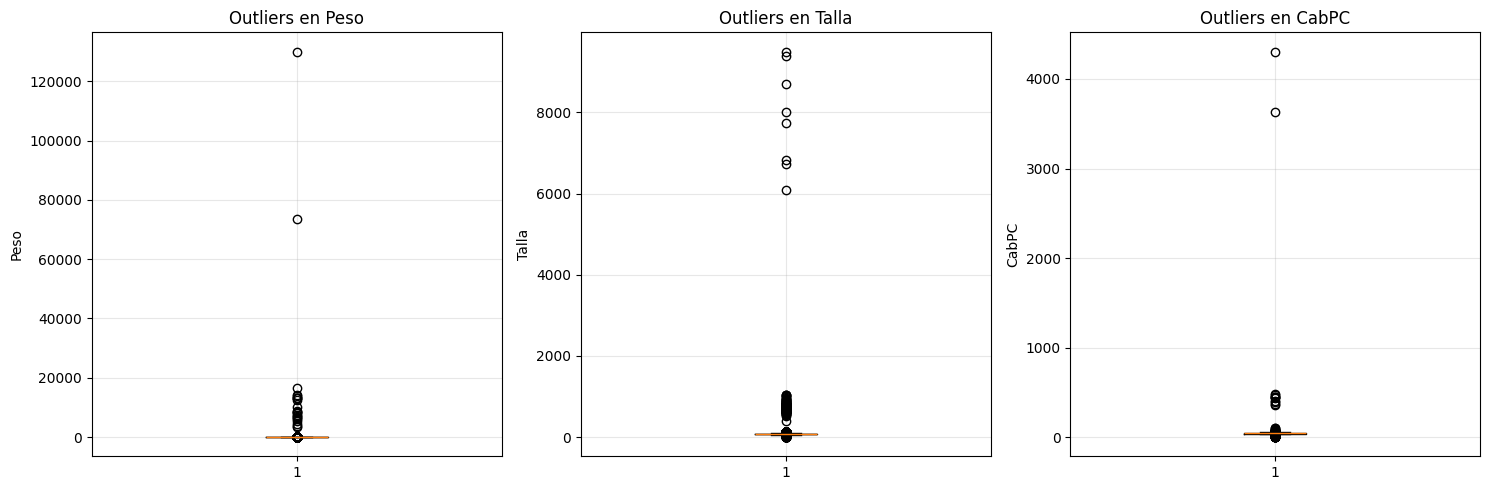

In [101]:
# Visualizar outliers con boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(['Peso', 'Talla', 'CabPC']):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Outliers en {col}')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [102]:
# Imputacion por el percentile 99
for col in ['Peso','Talla','CabPC']:
    lower = df[col].quantile(0.001)
    upper = df[col].quantile(0.999)
    df[col] = np.clip(df[col], lower, upper)

In [103]:
df.head()

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,edad_meses,control_esperado,flg_cognitivo,flg_lenguaje,flg_motora_fina,flg_motora_gruesa,flg_social,flg_alguna,flg_total,primer_alguna,primer_control_esperado,ultimo_control,cant_controles_primer_alguna,cantidad_controles,num_controles_previos_deficit,nro_control_recreado,num_controles_posteriores_deficit,_TE_z,_PE_z,_PT_z,T/E_cat,P/E_cat,P/T_cat
0,2014-10-01,57921.0,CRED,N,M,1m,1.0,4.18,53.4,37.0,Normal,+-1,+-1,-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI,1.0,2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,4.0,NaN,1,NaN,1.0,-1.0,1.0,N,N,N
1,2014-11-06,57921.0,CRED,C,M,2m,2.0,5.53,57.6,38.0,Normal,+-1,+-1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8,EP,NaN,SI,SI,SI,2.0,3,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,2,NaN,1.0,1.0,1.0,N,N,N
2,2014-12-03,57921.0,CRED,C,M,3m,3.0,6.32,61.2,39.0,Normal,+1,+1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,Recup,NaN,SI,SI,SI,3.0,4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,3,NaN,1.0,1.0,1.0,N,N,N
3,2015-01-05,57921.0,CRED,C,M,4m,4.0,7.09,64.0,39.5,Normal,+-1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI,4.0,5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,4,NaN,1.0,1.0,1.0,N,N,N
4,2015-02-02,57921.0,CRED,C,M,5m,5.0,7.61,66.1,NaN,Normal,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI,5.0,6,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,5,NaN,1.0,1.0,1.0,N,N,N


Se exporta tabla para segmentacion y feature engineering

In [104]:
df.to_csv("../data/intermediate/tani_preprocessed_1.csv", index=False)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454901 entries, 0 to 454900
Data columns (total 55 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Fecha                              454901 non-null  datetime64[ns]
 1   N_HC                               454901 non-null  float64       
 2   Tipo_Paciente                      454901 non-null  object        
 3   Categoría                          454901 non-null  object        
 4   Sexo                               454901 non-null  object        
 5   Edad                               454901 non-null  object        
 6   N_Control                          454900 non-null  float64       
 7   Peso                               454869 non-null  float64       
 8   Talla                              454831 non-null  float64       
 9   CabPC                              275650 non-null  float64       
 10  Diag_Nacimiento     

In [106]:
df.columns

Index(['Fecha', 'N_HC', 'Tipo_Paciente', 'Categoría', 'Sexo', 'Edad',
       'N_Control', 'Peso', 'Talla', 'CabPC', 'Diag_Nacimiento', 'P/T', 'T/E',
       'P/E', 'Ganancia_Peso_Talla', 'Dx_Nutricional', 'CN-CA',
       'Mantiene_Diag_Fav/Desf', 'Recuperado', 'Lactancia', 'Razón', 'ACA',
       'Tam_para', 'Tam_graha', 'Tam_hb', 'Acompaña_control', 'Enfermera',
       '(M) - FG', '(M) - FF', '(C) - Cog', '(L) - Len', '(S) - Soc',
       'edad_meses', 'control_esperado', 'flg_cognitivo', 'flg_lenguaje',
       'flg_motora_fina', 'flg_motora_gruesa', 'flg_social', 'flg_alguna',
       'flg_total', 'primer_alguna', 'primer_control_esperado',
       'ultimo_control', 'cant_controles_primer_alguna', 'cantidad_controles',
       'num_controles_previos_deficit', 'nro_control_recreado',
       'num_controles_posteriores_deficit', '_TE_z', '_PE_z', '_PT_z',
       'T/E_cat', 'P/E_cat', 'P/T_cat'],
      dtype='object')

In [107]:
def calcular_flg_social_lenguaje(df):

    columnas_flags = [
        'flg_lenguaje', 
        'flg_social'
    ]
    suma_flags = df[columnas_flags].sum(axis=1)
    _flg = np.where(suma_flags > 0, 1, suma_flags)
    
    return pd.Series(_flg, index=df.index)

In [108]:
df['flg_social_lenguaje'] = calcular_flg_social_lenguaje(df)

In [109]:
df.head()

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,edad_meses,control_esperado,flg_cognitivo,flg_lenguaje,flg_motora_fina,flg_motora_gruesa,flg_social,flg_alguna,flg_total,primer_alguna,primer_control_esperado,ultimo_control,cant_controles_primer_alguna,cantidad_controles,num_controles_previos_deficit,nro_control_recreado,num_controles_posteriores_deficit,_TE_z,_PE_z,_PT_z,T/E_cat,P/E_cat,P/T_cat,flg_social_lenguaje
0,2014-10-01,57921.0,CRED,N,M,1m,1.0,4.18,53.4,37.0,Normal,+-1,+-1,-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI,1.0,2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,4.0,NaN,1,NaN,1.0,-1.0,1.0,N,N,N,0.0
1,2014-11-06,57921.0,CRED,C,M,2m,2.0,5.53,57.6,38.0,Normal,+-1,+-1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8,EP,NaN,SI,SI,SI,2.0,3,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,2,NaN,1.0,1.0,1.0,N,N,N,0.0
2,2014-12-03,57921.0,CRED,C,M,3m,3.0,6.32,61.2,39.0,Normal,+1,+1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,Recup,NaN,SI,SI,SI,3.0,4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,3,NaN,1.0,1.0,1.0,N,N,N,0.0
3,2015-01-05,57921.0,CRED,C,M,4m,4.0,7.09,64.0,39.5,Normal,+-1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI,4.0,5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,4,NaN,1.0,1.0,1.0,N,N,N,0.0
4,2015-02-02,57921.0,CRED,C,M,5m,5.0,7.61,66.1,NaN,Normal,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI,5.0,6,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2,20,15,NaN,NaN,5,NaN,1.0,1.0,1.0,N,N,N,0.0


In [110]:
diccionario = {
    # Variables directamente del Excel
    'Fecha': 'Fecha de atención médica del niño(a)',
    'N_HC': 'Número de historia clínica asignada al paciente',  
    'Sexo': 'Género del niño(a). F: Femenino; M: Masculino',
    'Peso': 'Peso registrado del niño(a) en kilogramos', 
    'Talla': 'Talla/estatura registrada del niño(a) en centímetros',
    'CabPC': 'Perímetro cefálico del niño(a) en centímetros', 
    'Diag_Nacimiento': 'Diagnóstico de nacimiento. Valores: Normal, Pretérmino, BPN (Bajo Peso al Nacer), Macrosómico', 
    'Ganancia_Peso_Talla': 'Ganancia del peso y talla (adecuada o inadecuada). Combinaciones: GIP/GIT, GAP/GIT, GIP/GAT, GAP/GAT', 
    'Dx_Nutricional': 'Diagnóstico nutricional. N: Normal, O: Obesidad, R: Riesgo, S: Sobrepeso, DC: D. Crónica, DA: D. Aguda, DG: D. Global', 
    'CN-CA': 'Continuidad del Dx Nutricional. CN: Caso Nuevo, CA: Caso Antiguo',
    'Mantiene_Diag_Fav/Desf': 'Seguimiento al diagnóstico nutricional. Fav: Favorable, Desf: Desfavorable', 
    'Recuperado': 'Recuperación en el diagnóstico nutricional (ej: D. Global a Normal, Riesgo a Normal, etc.)', 
    'Lactancia': 'Tipo de lactancia actual (hasta 6 meses). LME: Lactancia Materna Exclusiva, LMX: Lactancia Mixta, LA: Lactancia Artificial', 
    'Razón': 'Motivo de LMX o Artificial. 1: Otros, 2: Voluntad Propia, 3: Poca producción, 4: Estudio/Trabajo, 5: Indicación médica', 
    'ACA': 'Alimentación complementaria activa. SI/NO',
    'Tam_para': 'Resultado de examen de parásitos. Positivo/Negativo',
    'Tam_graha': 'Resultado del test de Graham. Positivo/Negativo',
    'Tam_hb': 'Resultado de dosaje de hemoglobina',
    'T/E_cat': 'Categoría del percentil Talla/Edad. N: Normal, R: Riesgo, DC: D. Crónica',
    'P/E_cat': 'Categoría del percentil Peso/Edad. N: Normal, R: Riesgo, DA: D. Aguda', 
    'P/T_cat': 'Categoría del percentil Peso/Talla. N: Normal, O: Obesidad, S: Sobrepeso, DA: D. Aguda',
    # Variables calculadas/derivadas (no están en Excel, inferidas del contexto)
    'edad_meses': 'Edad del niño(a) expresada en meses',
    'flg_cognitivo': 'Flag binario para área de desarrollo cognitivo (0: Normal, 1: Déficit)',
    'flg_lenguaje': 'Flag binario para área de desarrollo de lenguaje (0: Normal, 1: Déficit)',
    'flg_motora_fina': 'Flag binario para área de desarrollo motora fina (0: Normal, 1: Déficit)',
    'flg_motora_gruesa': 'Flag binario para área de desarrollo motora gruesa (0: Normal, 1: Déficit)',
    'flg_social': 'Flag binario para área de desarrollo social (0: Normal, 1: Déficit)',
    'flg_alguna': 'Flag que indica si tiene algún déficit en cualquier área de desarrollo (0: No, 1: Sí)',
    'flg_total': 'Flag que indica si tiene déficit en todas las áreas de desarrollo',
    'flg_social_lenguaje': 'Flag que indica si tiene déficit en área social o de lenguaje (0: No, 1: Sí)',
    'control_esperado': 'Número de control esperado según la edad del niño(a)',
    'primer_alguna': 'Número de control en el que se detectó el primer déficit (flg_alguna=1)',
    'primer_control_esperado': 'Número del primer control esperado según la edad',
    'ultimo_control': 'Número del último control registrado',
    'cant_controles_primer_alguna': 'Cantidad de controles hasta detectar el primer déficit',
    'cantidad_controles': 'Cantidad total de controles realizados',
    'num_controles_previos_deficit': 'Número de controles previos antes de detectar déficit',
    'nro_control_recreado': 'Número de control recreado o recalculado',
    'num_controles_posteriores_deficit': 'Número de controles posteriores al déficit detectado',
    

}

In [111]:
diccionario.keys()

dict_keys(['Fecha', 'N_HC', 'Sexo', 'Peso', 'Talla', 'CabPC', 'Diag_Nacimiento', 'Ganancia_Peso_Talla', 'Dx_Nutricional', 'CN-CA', 'Mantiene_Diag_Fav/Desf', 'Recuperado', 'Lactancia', 'Razón', 'ACA', 'Tam_para', 'Tam_graha', 'Tam_hb', 'T/E_cat', 'P/E_cat', 'P/T_cat', 'edad_meses', 'flg_cognitivo', 'flg_lenguaje', 'flg_motora_fina', 'flg_motora_gruesa', 'flg_social', 'flg_alguna', 'flg_total', 'flg_social_lenguaje', 'control_esperado', 'primer_alguna', 'primer_control_esperado', 'ultimo_control', 'cant_controles_primer_alguna', 'cantidad_controles', 'num_controles_previos_deficit', 'nro_control_recreado', 'num_controles_posteriores_deficit'])

In [112]:
df_filtrado_v2 = df[diccionario.keys()].copy()

In [113]:
df_filtrado_v2.to_csv("../data/intermediate/tani_preprocessed_final_v2.csv", index=False)
#df_filtrado_v2 = pd.read_csv("../data/intermediate/tani_preprocessed_final_v2.csv")
df_filtrado_v2.sample(100000).to_csv("../data/intermediate/tani_preprocessed_final_v2_sample.csv", index=False)

In [114]:
df_filtrado_v2.head()

,Fecha,N_HC,Sexo,Peso,Talla,CabPC,Diag_Nacimiento,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,T/E_cat,P/E_cat,P/T_cat,edad_meses,flg_cognitivo,flg_lenguaje,flg_motora_fina,flg_motora_gruesa,flg_social,flg_alguna,flg_total,flg_social_lenguaje,control_esperado,primer_alguna,primer_control_esperado,ultimo_control,cant_controles_primer_alguna,cantidad_controles,num_controles_previos_deficit,nro_control_recreado,num_controles_posteriores_deficit
0,2014-10-01,57921.0,M,4.18,53.4,37.0,Normal,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,N,N,N,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2,NaN,2,20,15,4.0,NaN,1,NaN
1,2014-11-06,57921.0,M,5.53,57.6,38.0,Normal,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,N,N,N,2.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,3,NaN,2,20,15,NaN,NaN,2,NaN
2,2014-12-03,57921.0,M,6.32,61.2,39.0,Normal,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,N,N,N,3.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4,NaN,2,20,15,NaN,NaN,3,NaN
3,2015-01-05,57921.0,M,7.09,64.0,39.5,Normal,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,N,N,N,4.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,5,NaN,2,20,15,NaN,NaN,4,NaN
4,2015-02-02,57921.0,M,7.61,66.1,NaN,Normal,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,N,N,N,5.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,6,NaN,2,20,15,NaN,NaN,5,NaN




4. TABLA CRUZADA: cant_controles_primer_alguna vs ultimo_control (PACIENTES)
--------------------------------------------------------------------------------

FRECUENCIA:
ultimo_control                 12   13   14   15   16   17   18   19   20   21   22   23   24   25    26  Total
cant_controles_primer_alguna                                                                                   
0                               1    0    0    0    0    0    0    0    0    0    0    0    0    0     0    212
1                               0    0    0    0    0    0    0    0    0    0    0    0    0    1     1    149
2                               0    0    0    0    0    0    0    0    0    0    0    1    0    0     1    172
3                               1    0    0    0    0    0    0    0    0    1    1    1    0    0     2    172
4                               7    2    0    0    0    0    1    0    0    0    1    0    0    0     0    190
5                               8    2    1

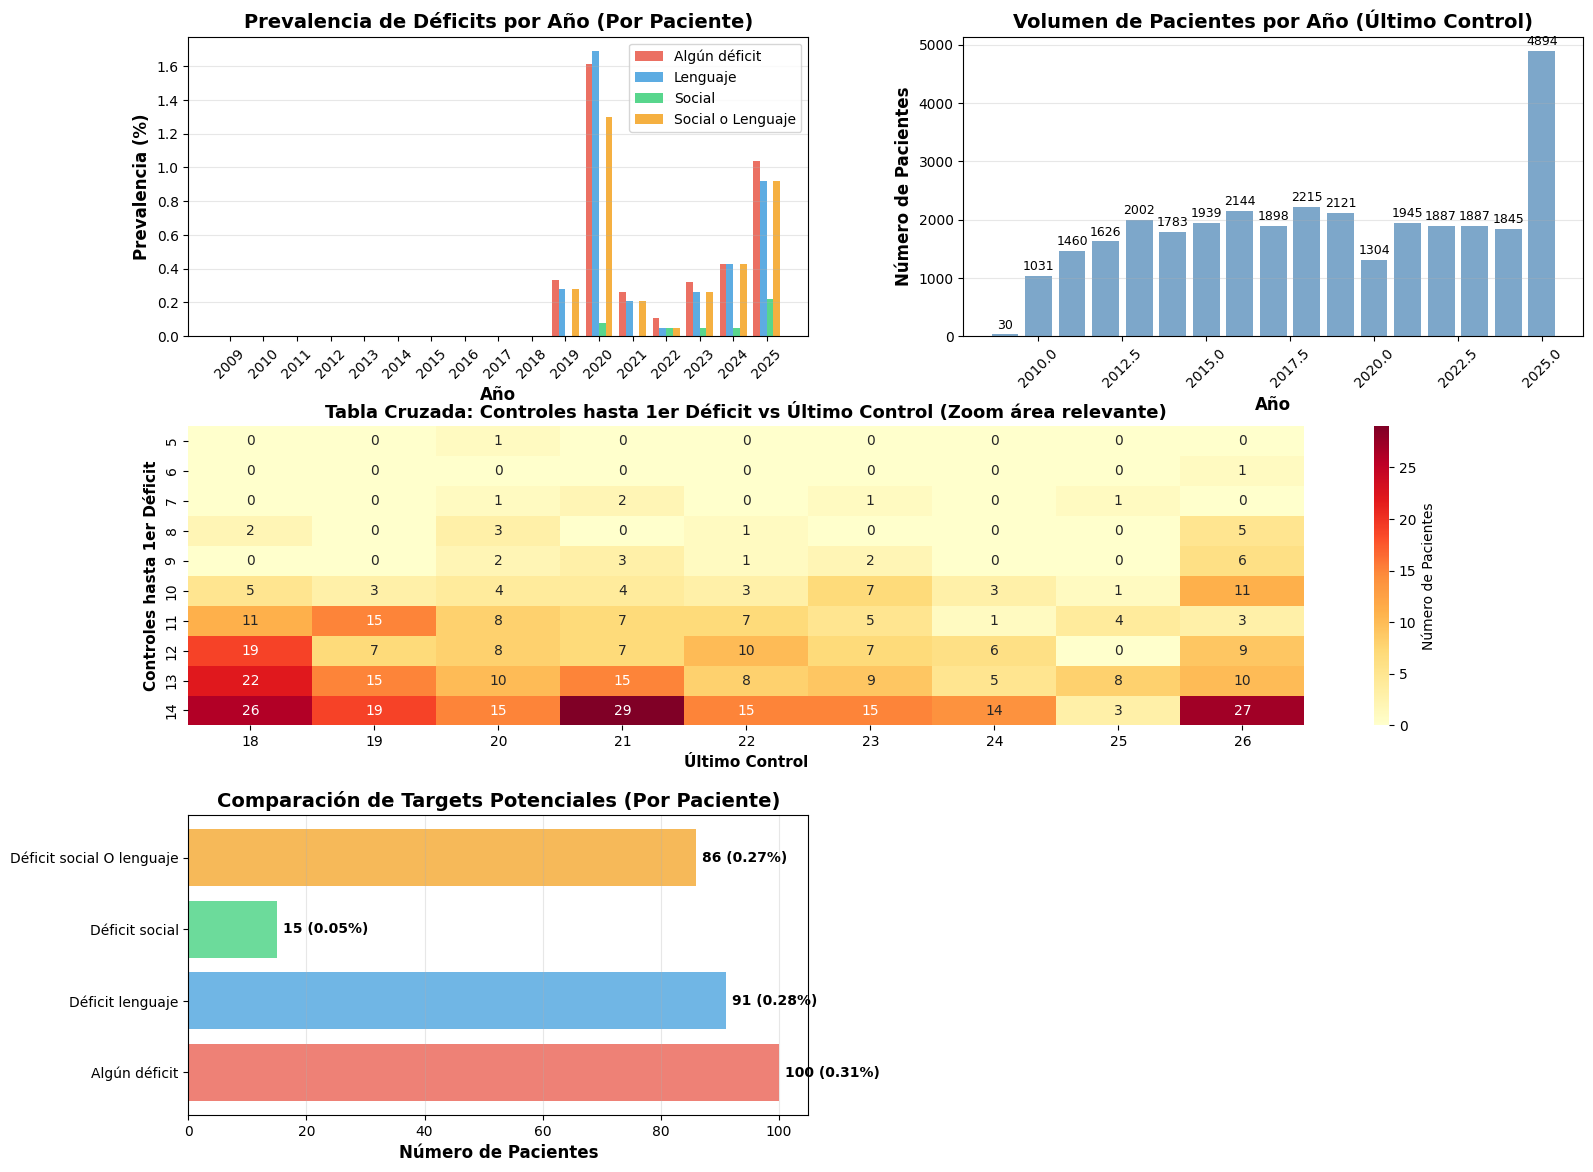

In [143]:
# 4. TABLA CRUZADA POR PACIENTE
print("\n\n4. TABLA CRUZADA: cant_controles_primer_alguna vs ultimo_control (PACIENTES)")
print("-"*80)

tabla_cruzada = pd.crosstab(
    df_2023['cant_controles_primer_alguna'], 
    df_2023['ultimo_control'],
    margins=True,
    margins_name='Total'
)

# Calcular porcentajes por celda
tabla_pct = (tabla_cruzada / len(df_2023) * 100).round(1)

# Mostrar solo columnas relevantes
cols_mostrar = [c for c in range(12, 31) if c in tabla_cruzada.columns] + ['Total']
print("\nFRECUENCIA:")
print(tabla_cruzada[cols_mostrar].to_string())

print("\nPORCENTAJE (% del total de pacientes 2023+):")
print(tabla_pct[cols_mostrar].to_string())

# VISUALIZACIONES
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.25)

# Gráfico 1: Prevalencia por año
ax1 = fig.add_subplot(gs[0, 0])
years = resumen_anio.index
width = 0.2
x = np.arange(len(years))

ax1.bar(x - 1.5*width, resumen_anio['%_alguna'], width, label='Algún déficit', alpha=0.8, color='#e74c3c')
ax1.bar(x - 0.5*width, resumen_anio['%_lenguaje'], width, label='Lenguaje', alpha=0.8, color='#3498db')
ax1.bar(x + 0.5*width, resumen_anio['%_social'], width, label='Social', alpha=0.8, color='#2ecc71')
ax1.bar(x + 1.5*width, resumen_anio['%_soc_leng'], width, label='Social o Lenguaje', alpha=0.8, color='#f39c12')

ax1.set_xlabel('Año', fontsize=12, fontweight='bold')
ax1.set_ylabel('Prevalencia (%)', fontsize=12, fontweight='bold')
ax1.set_title('Prevalencia de Déficits por Año (Por Paciente)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(years, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Volumen de pacientes por año
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(resumen_anio.index, resumen_anio['Pacientes'], color='steelblue', alpha=0.7)
ax2.set_xlabel('Año', fontsize=12, fontweight='bold')
ax2.set_ylabel('Número de Pacientes', fontsize=12, fontweight='bold')
ax2.set_title('Volumen de Pacientes por Año (Último Control)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Anotar total
for i, v in enumerate(resumen_anio['Pacientes']):
    ax2.text(resumen_anio.index[i], v + 50, str(v), ha='center', va='bottom', fontsize=9)

# Gráfico 3: Heatmap de tabla cruzada
ax3 = fig.add_subplot(gs[1, :])
tabla_heatmap = tabla_cruzada.iloc[5:15, -10:-1]  # Zoom en área relevante
sns.heatmap(tabla_heatmap, annot=True, fmt='g', cmap='YlOrRd', ax=ax3, 
            cbar_kws={'label': 'Número de Pacientes'})
ax3.set_title('Tabla Cruzada: Controles hasta 1er Déficit vs Último Control (Zoom área relevante)', 
              fontsize=13, fontweight='bold')
ax3.set_xlabel('Último Control', fontsize=11, fontweight='bold')
ax3.set_ylabel('Controles hasta 1er Déficit', fontsize=11, fontweight='bold')

# Gráfico 4: Comparación de targets
ax4 = fig.add_subplot(gs[2, 0])
target_data = pd.DataFrame({
    'Target': list(targets.values()),
    'Pacientes': [(df_pacientes[col] == 1).sum() for col in targets.keys()],
    'Porcentaje': [(df_pacientes[col] == 1).sum() / len(df_pacientes) * 100 for col in targets.keys()]
})

colors_bar = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
bars = ax4.barh(target_data['Target'], target_data['Pacientes'], color=colors_bar, alpha=0.7)
ax4.set_xlabel('Número de Pacientes', fontsize=12, fontweight='bold')
ax4.set_title('Comparación de Targets Potenciales (Por Paciente)', fontsize=14, fontweight='bold')

for i, (casos, pct) in enumerate(zip(target_data['Pacientes'], target_data['Porcentaje'])):
    ax4.text(casos + 1, i, f'{casos} ({pct:.2f}%)', va='center', fontsize=10, fontweight='bold')

ax4.grid(True, alpha=0.3, axis='x')


Nuestra nueva poblacion objetivo son aquellos pacientes del 2023 en adelante que hayan tenido hasta 3 controles esperados (1, 2 o 3), y se buscara predecir el riesgo de desarrollo en las areas de lenguaje y social.

In [120]:
# Primer filtro: identificar los N_HC que cumplen tus condiciones
df_filtrado_temp = df[
    (df['Fecha'].dt.year >= 2023) & 
    (df['primer_control_esperado'].isin([1,2,3])) & 
    (df['cant_controles_primer_alguna'] >= 6) & 
    (df['ultimo_control'] >= 19)
].copy()

# Obtener la lista de N_HC únicos que cumplen el criterio
nhc_validos = df_filtrado_temp['N_HC'].unique()

# Segundo filtro: traer TODOS los registros de esos N_HC (incluyendo 2022 y años anteriores)
df_filtrado = df[df['N_HC'].isin(nhc_validos)].copy()

print(f"N_HC únicos que cumplen criterio: {len(nhc_validos)}")
print(f"Registros totales (incluyendo históricos): {len(df_filtrado)}")
print(f"Rango de fechas: {df_filtrado['Fecha'].min()} a {df_filtrado['Fecha'].max()}")

N_HC únicos que cumplen criterio: 3721
Registros totales (incluyendo históricos): 75838
Rango de fechas: 2009-09-27 00:00:00 a 2025-08-12 00:00:00


In [121]:
#df_filtrado = df[(df['Fecha'].dt.year >= 2023)&(df['control_esperado'].isin([1,2,3]))].copy()
#df_filtrado.head()
#(df['cant_controles_primer_alguna'] >= 6) & (df['ultimo_control'] >= 19)

In [122]:
df_filtrado.shape

(75838, 40)

In [123]:
df_filtrado.to_csv("../data/intermediate/tani.csv", index=False)

TRATAMIENTO INFO UBIGEO-CONSEJERIAS

In [124]:
## UBIGEO CONSEGERIAS
df_pacientes    = pd.read_excel("../data/raw/UBIGEO - CONSEJERÍAS.xlsx", sheet_name="PACIENTES - UBIGEO - DX")
df_consejerias  = pd.read_excel("../data/raw/UBIGEO - CONSEJERÍAS.xlsx", sheet_name="CONSEJERÍAS")

In [125]:
df_consejerias.head()

,Fecha,Nº_HCL,Tipo_Paciente,Nº_Control,Sexo,Edad,Consejería Lactancia Materna,Consejería Alimentación Complementaria,Consejería Higiene Corporal,Consejería Higiene Bucal,Consejería Suplementación con Hierro,Consejería Actividades Desarrollo,Consejería Cuidados post vacunas,Enfermera
0,2023-01-02,85005,CRED,10.0,M,11m,False,True,True,True,False,True,False,1
1,2023-01-02,86837,CRED,4.0,M,4m,True,False,True,False,False,True,True,3
2,2023-01-02,86761,CRED,3.0,M,4m,True,False,True,False,False,False,False,3
3,2023-01-02,87365,CRED,2.0,F,2m,True,False,False,False,False,True,False,8
4,2023-01-02,87410,CRED,2.0,M,2m,True,False,False,False,False,True,True,8


In [126]:
df_pacientes.rename(columns={'Nº_HCL': 'N_HC'}, inplace=True)
df_consejerias.rename(columns={'Nº_HCL': 'N_HC'}, inplace=True)
df_consejerias.rename(columns={'Nº_Control': 'N_Control'}, inplace=True)

print("Duplicados en df_pacientes:", df_pacientes.duplicated().sum())
print("Duplicados en df_consejerias:", df_consejerias.duplicated().sum())

Duplicados en df_pacientes: 0
Duplicados en df_consejerias: 7


In [127]:
# Se eliminan registros duplicados exactos de ambos datasets y se resetea el index
df_consejerias   = df_consejerias.drop_duplicates().reset_index(drop=True)

print("Duplicados en df_consejerias:", df_consejerias.duplicated().sum())

Duplicados en df_consejerias: 0


In [128]:
#No hay duplicados en los registros de consejerias
keys = ['Fecha','N_HC', 'N_Control']

mask_dup_df_consejerias = df_consejerias.duplicated(subset=keys, keep=False)
df_consejerias_uniques = df_consejerias[~mask_dup_df_consejerias].copy()

print("Duplicados en df_consejerias:", int(mask_dup_df_consejerias.sum()))
print("Filas únicas df_consejerias:", df_consejerias_uniques.shape)

Duplicados en df_consejerias: 0
Filas únicas df_consejerias: (78911, 14)


In [129]:
def calcular_flg_consejeria(df,columna_consejeria='Consejería Lactancia Materna'):
    """
    Convierte los valores booleanos textuales de una columna de consejería:
    - 'VERDADERO' o True -> 1
    - 'FALSO' o False -> 0
    - vacío o NaN -> NaN
    
    Parámetros:
    df: DataFrame que contiene la columna de consejería
    columna_consejeria: nombre de la columna a evaluar
    
    Retorna:
    Serie de pandas con los flags (1, 0, o NaN)
    """

    # Verificar que la columna existe
    if columna_consejeria not in df.columns:
        raise ValueError(f"La columna '{columna_consejeria}' no existe en el DataFrame")
    
    def evaluar_consejeria(valor):
        if pd.isna(valor):
            return np.nan
        
        valor_str = str(valor).strip().upper()
        
        if valor_str in ["VERDADERO", "TRUE", "1"]:
            return 1
        elif valor_str in ["FALSO", "FALSE", "0"]:
            return 0
        elif valor_str == "":
            return np.nan
        else:
            return np.nan  # Por defecto si hay valores inesperados

    # Aplicar la función a la columna
    return df[columna_consejeria].apply(evaluar_consejeria) 

In [130]:
df_consejerias_uniques['flg_consj_lact_materna']=calcular_flg_consejeria(df_consejerias_uniques,'Consejería Lactancia Materna')
df_consejerias_uniques['flg_consj_higne_corporal']=calcular_flg_consejeria(df_consejerias_uniques,'Consejería Higiene Corporal')
df_consejerias_uniques['flg_consj_higne_bucal']=calcular_flg_consejeria(df_consejerias_uniques,'Consejería Higiene Bucal')
df_consejerias_uniques['flg_consj_supl_hierro']=calcular_flg_consejeria(df_consejerias_uniques,'Consejería Suplementación con Hierro')
df_consejerias_uniques['flg_consj_desarrollo']=calcular_flg_consejeria(df_consejerias_uniques,'Consejería Actividades Desarrollo')
df_consejerias_uniques['flg_consj_vacunas']=calcular_flg_consejeria(df_consejerias_uniques,'Consejería Cuidados post vacunas')
df_consejerias_uniques.shape

(78911, 20)

In [131]:
## MERGE DATASET FILTRADO CON DATOS DE CONSEJERIA
columnas_clave = ['Fecha', 'N_HC', 'Tipo_Paciente']
columnas_consejeria = [
    'flg_consj_lact_materna',
    'flg_consj_higne_corporal',
    'flg_consj_higne_bucal',
    'flg_consj_supl_hierro',
    'flg_consj_desarrollo',
    'flg_consj_vacunas'
]

df_consejerias2 = df_consejerias_uniques[columnas_clave + columnas_consejeria]

df_filtrado2 = df_filtrado.merge(
    df_consejerias2,
    how='left',  # Usamos left porque se pierde el historial de los primeros controles - cuales no tienen registro de consegeria
    on=columnas_clave
)

KeyError: 'Tipo_Paciente'

In [ ]:
df_filtrado2.head()

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,edad_meses,control_esperado,flg_cognitivo,flg_lenguaje,flg_motora_fina,flg_motora_gruesa,flg_social,flg_alguna,flg_total,primer_alguna,primer_control_esperado,ultimo_control,cant_controles_primer_alguna,cantidad_controles,num_controles_previos_deficit,nro_control_recreado,num_controles_posteriores_deficit,_TE_z,_PE_z,_PT_z,T/E_cat,P/E_cat,P/T_cat,flg_social_lenguaje,flg_consj_lact_materna,flg_consj_higne_corporal,flg_consj_higne_bucal,flg_consj_supl_hierro,flg_consj_desarrollo,flg_consj_vacunas
0,2009-09-27,77784.0,CRED,Continuador,M,4m,4.0,6.405,60.0,41.1,PTIN,+1,<-1,-1,GIP-GIT,Riesgo T/E,CA,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,6,SI,NaN,SI,SI,SI,4.0,5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1,26,21,NaN,NaN,1,NaN,-1.000001,-1.0,1.0,N,N,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,58990.0,CRED,N,F,1m,1.0,3.530,51.5,35.5,Normal,-1,-1,<-1,GIP-GIT,Riesgo T/E,CN,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,4,EP,NaN,SI,SI,SI,1.0,2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1,23,24,NaN,NaN,1,NaN,-1.0,-1.000001,-1.0,N,N,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-03,58990.0,CRED,C,F,2m,2.0,4.635,54.5,38.0,Normal,>+1,<-1,-1,GAP-GAT,Riesgo T/E,CA,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,4,EP,NaN,SI,SI,SI,2.0,3,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1,23,24,NaN,NaN,2,NaN,-1.000001,-1.0,1.000001,N,N,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-03-03,58990.0,CRED,C,F,3m,3.0,5.515,57.7,39.0,Normal,>+1,<-1,-1,GAP-GAT,Riesgo T/E,CA,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,4,Recup,NaN,SI,SI,SI,3.0,4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1,23,24,NaN,NaN,3,NaN,-1.000001,-1.0,1.000001,N,N,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-04-01,58990.0,CRED,C,F,4m,4.0,6.325,60.5,40.0,Normal,+1,<-1,-1,GAP-GIT,Riesgo T/E,CA,Desf,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,4,SI,NaN,SI,SI,SI,4.0,5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1,23,24,NaN,NaN,4,NaN,-1.000001,-1.0,1.0,N,N,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_filtrado2.to_csv("../data/intermediate/tanifiltradoconsejeria.csv", index=False)

In [ ]:
def features_6prev_window(
    df,
    vars_cols=('Peso','Talla','CabPC','edad_meses','control_esperado','_TE_z','_PE_z','_PT_z'),
    columnas_consejeria=['flg_consj_lact_materna', 'flg_consj_higne_corporal', 
                         'flg_consj_higne_bucal', 'flg_consj_supl_hierro', 
                         'flg_consj_desarrollo', 'flg_consj_vacunas'],
    window=6,
    order_by='control_esperado',
    atol=1e-6
):
    """
    Para cada N_HC:
      1) Ordena por `order_by`.
      2) Si existe `primer_alguna`, usa ese valor como referencia; si no, `ultimo_control`.
      3) Encuentra la fila donde control_esperado ≈ referencia (np.isclose con `atol`).
      4) Toma los `window` registros previos [pos-window : pos).
      5) Calcula features estadísticas y adicionales.

    Features generadas:
      - Estadísticas básicas: mean/min/max/std para vars_cols
      - Slopes: pendiente para Peso, Talla, CabPC
      - Consejería: valor actual y suma previa
      - Cantidad_acompañantes: conteo distintivo de Acompaña_control
      - flg_desnutricion: 1 si hubo algún Dx_Nutricional últimos 6 controles
      - porc_desnutricion: ratio de controles con desnutrición
      - flg_asiste_control_esperado: 1 si los últimos 6 controles esperados son consecutivos
      - flg_alguna_vez_motora: 1 si alguna vez tuvo déficit motor (fino o grueso)
      - flg_alguna_vez_cognitivo: 1 si alguna vez tuvo déficit cognitivo
    """
    req = ['N_HC', 'control_esperado', 'primer_alguna', 'ultimo_control']
    faltan = [c for c in req if c not in df.columns]
    if faltan:
        raise ValueError(f'Faltan columnas requeridas: {faltan}')

    d = df.copy()

    # Tipos numéricos clave
    d['control_esperado'] = pd.to_numeric(d['control_esperado'], errors='coerce')
    d['primer_alguna']    = pd.to_numeric(d['primer_alguna'], errors='coerce')
    d['ultimo_control']   = pd.to_numeric(d['ultimo_control'], errors='coerce')

    # Asegura numéricas para las variables analizadas
    vars_cols = [c for c in vars_cols if c in d.columns]
    for c in vars_cols:
        d[c] = pd.to_numeric(d[c], errors='coerce')
    
    # Asegura numéricas para columnas de consejería
    columnas_consejeria = [c for c in columnas_consejeria if c in d.columns]
    for c in columnas_consejeria:
        d[c] = pd.to_numeric(d[c], errors='coerce')
    
    # Asegura numéricas para columnas de déficit motor y cognitivo
    if 'flg_motora_fina' in d.columns:
        d['flg_motora_fina'] = pd.to_numeric(d['flg_motora_fina'], errors='coerce')
    if 'flg_motora_gruesa' in d.columns:
        d['flg_motora_gruesa'] = pd.to_numeric(d['flg_motora_gruesa'], errors='coerce')
    if 'flg_cognitivo' in d.columns:
        d['flg_cognitivo'] = pd.to_numeric(d['flg_cognitivo'], errors='coerce')

    # Columna de orden
    if order_by == 'Fecha':
        d['__order__'] = pd.to_datetime(d['Fecha'], dayfirst=True, errors='coerce')
    else:
        d['__order__'] = pd.to_numeric(d[order_by], errors='coerce')

    def calculate_slope(series, x_values=None):
        """Calcula la pendiente (slope) de una serie temporal usando regresión lineal simple"""
        series_clean = series.dropna()
        if len(series_clean) < 2:
            return np.nan
        
        if x_values is None:
            x = np.arange(len(series_clean))
        else:
            x = x_values[:len(series_clean)]
        
        y = series_clean.values
        
        try:
            # Regresión lineal simple: slope = cov(x,y) / var(x)
            x_mean = np.mean(x)
            y_mean = np.mean(y)
            
            numerator = np.sum((x - x_mean) * (y - y_mean))
            denominator = np.sum((x - x_mean) ** 2)
            
            if denominator == 0:
                return np.nan
            
            slope = numerator / denominator
            return slope
        except:
            return np.nan

    def per_hc(g):
        g = g.sort_values('__order__').reset_index(drop=True)

        # deficit: 1 si existe al menos un primer_alguna no nulo
        deficit = int(g['primer_alguna'].notna().any())

        # referencia: primer_alguna si existe, si no ultimo_control
        if deficit == 1:
            ref_val = g.loc[g['primer_alguna'].notna(), 'primer_alguna'].iloc[0]
        elif g['ultimo_control'].notna().any():
            ref_val = g.loc[g['ultimo_control'].notna(), 'ultimo_control'].iloc[0]
        else:
            # sin referencia posible
            out = {f'pre{window}_{stat}__{c}': np.nan
                   for c in vars_cols for stat in ('mean','min','max','std')}
            for c in columnas_consejeria:
                out[f'{c}_valor'] = np.nan
                out[f'{c}_sum_prev'] = np.nan
            
            out.update({
                f'pre{window}_n__rows': 0,
                'ultima ventana': np.nan,
                'deficit': 0,
                'slope_peso': np.nan,
                'slope_talla': np.nan,
                'slope_cab_pc': np.nan,
                'Cantidad_acompañantes': 0,
                'flg_desnutricion': 0,
                'porc_desnutricion': 0.0,
                'flg_asiste_control_esperado': 0,
                'flg_alguna_vez_motora': 0,
                'flg_alguna_vez_cognitivo': 0
            })
            return pd.Series(out)

        # encontrar posición del evento
        mask = np.isclose(g['control_esperado'].to_numpy(), ref_val, atol=atol, equal_nan=False)
        idx = np.flatnonzero(mask)
        if idx.size == 0:
            out = {f'pre{window}_{stat}__{c}': np.nan
                   for c in vars_cols for stat in ('mean','min','max','std')}
            for c in columnas_consejeria:
                out[f'{c}_valor'] = np.nan
                out[f'{c}_sum_prev'] = np.nan
            
            out.update({
                f'pre{window}_n__rows': 0,
                'ultima ventana': ref_val,
                'deficit': deficit,
                'slope_peso': np.nan,
                'slope_talla': np.nan,
                'slope_cab_pc': np.nan,
                'Cantidad_acompañantes': 0,
                'flg_desnutricion': 0,
                'porc_desnutricion': 0.0,
                'flg_asiste_control_esperado': 0,
                'flg_alguna_vez_motora': 0,
                'flg_alguna_vez_cognitivo': 0
            })
            return pd.Series(out)

        pos = idx[0]
        start = max(0, pos - window)
        prev = g.loc[start:pos-1]  # solo previos
        current_row = g.loc[pos]   # fila de referencia

        vals = {}
        
        # Features estadísticas originales
        for c in vars_cols:
            s = prev[c]
            vals[f'pre{window}_mean__{c}'] = s.mean(skipna=True)
            vals[f'pre{window}_min__{c}']  = s.min(skipna=True)
            vals[f'pre{window}_max__{c}']  = s.max(skipna=True)
            vals[f'pre{window}_std__{c}']  = s.std(skipna=True, ddof=1)
        
        # Slopes para Peso, Talla, CabPC
        vals['slope_peso'] = calculate_slope(prev['Peso']) if 'Peso' in prev.columns else np.nan
        vals['slope_talla'] = calculate_slope(prev['Talla']) if 'Talla' in prev.columns else np.nan
        vals['slope_cab_pc'] = calculate_slope(prev['CabPC']) if 'CabPC' in prev.columns else np.nan
        
        # Features de consejería
        for c in columnas_consejeria:
            vals[f'{c}_valor'] = current_row[c] if pd.notna(current_row[c]) else np.nan
            vals[f'{c}_sum_prev'] = prev[c].sum(skipna=True) if len(prev) > 0 else 0

        # Cantidad_acompañantes: conteo distintivo
        if 'Acompaña_control' in prev.columns:
            vals['Cantidad_acompañantes'] = prev['Acompaña_control'].nunique()
        else:
            vals['Cantidad_acompañantes'] = 0
        
        # flg_desnutricion: si hubo algún diagnóstico con "D."
        if 'Dx_Nutricional' in prev.columns:
            desnutricion_count = prev['Dx_Nutricional'].astype(str).str.contains('D\.', na=False, regex=True).sum()
            vals['flg_desnutricion'] = 1 if desnutricion_count > 0 else 0
            vals['porc_desnutricion'] = desnutricion_count / len(prev) if len(prev) > 0 else 0.0
        else:
            vals['flg_desnutricion'] = 0
            vals['porc_desnutricion'] = 0.0
        
        # flg_asiste_control_esperado: controles consecutivos
        if len(prev) > 0 and 'control_esperado' in prev.columns:
            controles = prev['control_esperado'].dropna().values
            if len(controles) >= 2:
                # Verificar si son consecutivos (diferencia de 1)
                diffs = np.diff(controles)
                vals['flg_asiste_control_esperado'] = 1 if np.all(np.abs(diffs - 1) < atol) else 0
            else:
                vals['flg_asiste_control_esperado'] = 0
        else:
            vals['flg_asiste_control_esperado'] = 0
        
        # flg_alguna_vez_motora: déficit motor en toda la historia previa
        motor_fino = prev['flg_motora_fina'].sum() if 'flg_motora_fina' in prev.columns else 0
        motor_grueso = prev['flg_motora_gruesa'].sum() if 'flg_motora_gruesa' in prev.columns else 0
        vals['flg_alguna_vez_motora'] = 1 if (motor_fino > 0 or motor_grueso > 0) else 0
        
        # flg_alguna_vez_cognitivo: déficit cognitivo en toda la historia previa
        if 'flg_cognitivo' in prev.columns:
            vals['flg_alguna_vez_cognitivo'] = 1 if prev['flg_cognitivo'].sum() > 0 else 0
        else:
            vals['flg_alguna_vez_cognitivo'] = 0

        vals[f'pre{window}_n__rows'] = len(prev)
        vals['ultima ventana'] = ref_val
        vals['deficit'] = deficit
        
        return pd.Series(vals)

    # Aplicar la función por cada grupo
    resultados = []
    for nhc, g in d.groupby('N_HC'):
        result = per_hc(g)
        result['N_HC'] = nhc
        resultados.append(result)
    
    feats = pd.DataFrame(resultados)
    # Mover N_HC al inicio
    cols = feats.columns.tolist()
    cols.remove('N_HC')
    feats = feats[['N_HC'] + cols]
    
    return feats

<>:189: SyntaxWarning: invalid escape sequence '\.'
<>:189: SyntaxWarning: invalid escape sequence '\.'
/var/folders/6y/25yxj2990rj329z1dj8hc6vr0000gn/T/ipykernel_93478/601199517.py:189: SyntaxWarning: invalid escape sequence '\.'
  desnutricion_count = prev['Dx_Nutricional'].astype(str).str.contains('D\.', na=False, regex=True).sum()


In [ ]:
#df_filtrado2.shape
vars_cols = ['Peso','Talla','CabPC','edad_meses','control_esperado','_TE_z','_PE_z','_PT_z']
columnas_consejeria = [
    'flg_consj_lact_materna',
    'flg_consj_higne_corporal',
    'flg_consj_higne_bucal',
    'flg_consj_supl_hierro',
    'flg_consj_desarrollo',
    'flg_consj_vacunas'
]

feats_prev6_mix = features_6prev_window(
    df_filtrado2,
    vars_cols=vars_cols,
    columnas_consejeria=columnas_consejeria,  # ← nombre correcto
    window=6,
    order_by='control_esperado'
)
# ver resultado
#feats_prev6_mix.head()

In [ ]:
df_filtrado['N_HC'].nunique()

3721

In [ ]:
feats_prev6_mix.shape

(3721, 57)

In [ ]:
feats_prev6_mix['N_HC'].nunique()

3721

In [ ]:
def limpiar_pacientes(df):
    """
    Limpia y normaliza columnas de información clínica del parto y nacimiento.

    Reglas:
    1. Edad_Gestacional -> extrae número de semanas (quita 'ss', 'aa', etc.).
    2. parto_mama -> los valores vacíos/nulos se reemplazan por 'Normal'.
    3. complicacion_parto_mama -> se agrupan categorías (cesárea, preeclampsia, etc.).
    """

    df = df.copy()

    #Edad_Gestacional -> extraer solo número de semanas
    def limpiar_edad_gestacional(x):
        if pd.isna(x):
            return np.nan
        s = str(x).strip().lower()
        s = re.sub(r'[^0-9]', '', s)  # conservar solo números
        try:
            return int(s)
        except ValueError:
            return np.nan

    df['Edad_Gestacional'] = df['Edad_Gestacional'].apply(limpiar_edad_gestacional)

    #Tipo_parto_mama -> valores vacíos o nulos a "Normal"
    df['parto_mama'] = df['parto_mama'].fillna('').replace('', 'Normal')

    #Complicacion_parto_mama -> agrupar categorías similares
    def normalizar_complicacion(x):
        if pd.isna(x) or str(x).strip() == '':
            return np.nan
        
        s = str(x).strip().lower()

        # Cesárea
        if re.search(r'cesar|cesárea|cesarea|cecarea|casarea', s):
            return 'Parto con cesarea'
        # Arritmia
        if re.search(r'aritmia|arritmia', s):
            return 'Parto con arritmia'
        # Anemia
        if re.search(r'anemia', s):
            return 'Parto con anemia'
        # Perdida de liquidos
        if re.search(r'.?dida de liqui', s):
            return 'Perdida de liquidos'
        #Cordon Umbilical
        if re.search(r'circular|cord[oó]n|condor|cordon', s):
            return 'Cordon umbilical'
        #Bebe Macrosomico
        if re.search(r'macrosomico|cord[oó]n|condor|cordon', s):
            return 'Cordon umbilical'
               
        # Preclampsia (todas las variantes)
        if re.search(r'pre.?clam|pre.?eclamp|pre.?clap|pre.?sia|pre.?clapc|preeclam', s):
            return 'Preclampsia'

        # Otras categorías (agregarás más luego)
        return s.capitalize()  # mantiene texto original capitalizado

    df['complicacion_parto_mama'] = df['complicacion_parto_mama'].apply(normalizar_complicacion)

    return df

In [ ]:
def tipificar_parto_bebe(diagnostico):
    if pd.isna(diagnostico):
        return np.nan
    
    diag = str(diagnostico).lower()
    
    # A. Infeccioso
    if any(x in diag for x in ['seps', 'infecc', 'infe', 'fieb', 'neumo', 'cist']):
        return 'Infeccioso / Séptico'
    
    # B. Respiratorio
    if any(x in diag for x in ['respir', 'asfix', 'aspir', 'hipoxi', 'sufri', 'taqui']):
        return 'Respiratorio'
    
    # C. Metabólico
    if any(x in diag for x in ['gluc', 'glic']):
        return 'Metabólico / Glucosa'
    
    # D. Hematológico
    if any(x in diag for x in ['bili', 'incomp', 'foto']):
        return 'Hematológico / Bilirrubina'
    
    # E. Peso y crecimiento
    if any(x in diag for x in ['peso', 'macro', 'premat']):
        return 'Peso / Crecimiento'
    
    # F. Neurológico
    if any(x in diag for x in ['encefal', 'ritmo', 'hipoxi']):
        return 'Neurológico'
    
    # G. Trauma físico
    if any(x in diag for x in ['fract', 'cefalo']):
        return 'Trauma / Lesión física'
    
    # H. Congénito
    if any(x in diag for x in ['down', 'genet', 'sindro']):
        return 'Congénito / Genético'
    
    # I. Procedimiento médico
    if any(x in diag for x in ['incub', 'lava', 'uci', 'hospi', 'tt']):
        return 'Procedimiento / Tratamiento'
    
    # J. Adaptación / observación
    if any(x in diag for x in ['observ', 'adapt', 'madre', 'evaluac']):
        return 'Adaptación / Observación'
    
    # K. Otros
    return 'Otro / No clasificado'

# Aplicar al DataFrame
df_pacientes['Cat_compl_part_bebe'] = df_pacientes['complicacion_parto_bebe'].apply(tipificar_parto_bebe)

In [ ]:
def tipificar_complicacion_parto_mama(texto):
    if pd.isna(texto):
        return np.nan

    t = str(texto).lower().strip()

    # A. Hipertensión / preeclampsia
    if any(x in t for x in ['precl', 'hipert', 'hta', 'presion', 'eclamp']):
        return 'Hipertensión / Preeclampsia'
    
    # B. Alteraciones tiroideas / endocrinas
    if any(x in t for x in ['tiroid', 'hipotir', 'hipertir']):
        return 'Trastornos tiroideos / endocrinos'
    
    # C. Diabetes y metabólicas
    if any(x in t for x in ['diab', 'macro', 'sobrepeso']):
        return 'Diabetes / Metabólico'
    
    # D. Infecciones maternas
    if any(x in t for x in ['infecc', 'infe', 'vph', 'sif', 'herp', 'molusc']):
        return 'Infección materna'
    
    # E. Hemorragias / anemia
    if any(x in t for x in ['sangr', 'hemorr', 'anem', 'perdida de sang']):
        return 'Hemorragia / Anemia'
    
    # F. Placentarias / líquido amniótico
    if any(x in t for x in ['placent', 'liquid', 'amniot', 'oligo', 'poco', 'insufic']):
        return 'Placenta / Líquido amniótico'
    
    # G. Distocia / mecánica / posición fetal
    if any(x in t for x in ['dilat', 'encaj', 'pelv', 'posic', 'podal', 'transv', 'cord', 'estrech', 'no des', 'contracc']):
        return 'Distocia / Posición fetal'
    
    # H. Condiciones maternas no obstétricas
    if any(x in t for x in ['epilep', 'tromb', 'colest', 'obes', 'miom', 'quiste', 'litia', 'macroadenoma']):
        return 'Condición materna no obstétrica'
    
    # I. Cesárea / inducción / parto programado
    if any(x in t for x in ['cesar', 'inducc', 'program', 'emer']):
        return 'Cesárea / Inducción'
    
    # J. Embarazo múltiple / prolongado
    if any(x in t for x in ['gemel', 'melli', 'post', 'prolong']):
        return 'Embarazo múltiple / prolongado'
    
    # K. Otro / no clasificado
    return 'Otro / No clasificado'


# Ejemplo de uso:
df_pacientes['Cat_Compl_Mama'] = df_pacientes['complicacion_parto_mama'].apply(tipificar_complicacion_parto_mama)

In [ ]:
df_pacientes.shape

(35705, 47)

In [ ]:
## MERGE DATASET 6ULT CONTROLES INFO UBIGEO Y DATOS AL NACER
columnas_HC = ['N_HC']
columnas_pacientes_dx = [
'Sexo','Diag_Nacimiento',
'Peso_al_Nacer','Talla_al_Nacer','PC_al_nacer',
'Edad_Gestacional','Tipo_de_lactancia',
'parto_mama','complicacion_parto_mama',
'numero_bebe','parto_bebe','complicacion_parto_bebe',
'Cat_Compl_Mama','Cat_compl_part_bebe'
]

df_pacientes2 = df_pacientes[columnas_HC + columnas_pacientes_dx]
df_pacientes2 = limpiar_pacientes(df_pacientes2)

In [ ]:
df_pacientes2.shape

(35705, 15)

In [ ]:
df_pacientes2.to_csv('../data/intermediate/pacientes.csv', index=False)

In [ ]:
feats_prev6_mix.shape

(3721, 57)

In [ ]:
feats_prev6_pacientes = feats_prev6_mix.merge(
    df_pacientes2,
    how='left',  # Usamos left porque se pierde el historial de los primeros controles - cuales no tienen registro de consegeria
    on='N_HC'
)

In [ ]:
feats_prev6_pacientes.shape

(3724, 71)

In [ ]:
feats_prev6_pacientes.to_excel('../data/intermediate/feats_prev6_mix.xlsx', index=False)

In [ ]:
feats_prev6_pacientes.head()

,N_HC,pre6_mean__Peso,pre6_min__Peso,pre6_max__Peso,pre6_std__Peso,pre6_mean__Talla,pre6_min__Talla,pre6_max__Talla,pre6_std__Talla,pre6_mean__CabPC,pre6_min__CabPC,pre6_max__CabPC,pre6_std__CabPC,pre6_mean__edad_meses,pre6_min__edad_meses,pre6_max__edad_meses,pre6_std__edad_meses,pre6_mean__control_esperado,pre6_min__control_esperado,pre6_max__control_esperado,pre6_std__control_esperado,pre6_mean___TE_z,pre6_min___TE_z,pre6_max___TE_z,pre6_std___TE_z,pre6_mean___PE_z,pre6_min___PE_z,pre6_max___PE_z,pre6_std___PE_z,pre6_mean___PT_z,pre6_min___PT_z,pre6_max___PT_z,pre6_std___PT_z,slope_peso,slope_talla,slope_cab_pc,flg_consj_lact_materna_valor,flg_consj_lact_materna_sum_prev,flg_consj_higne_corporal_valor,flg_consj_higne_corporal_sum_prev,flg_consj_higne_bucal_valor,flg_consj_higne_bucal_sum_prev,flg_consj_supl_hierro_valor,flg_consj_supl_hierro_sum_prev,flg_consj_desarrollo_valor,flg_consj_desarrollo_sum_prev,flg_consj_vacunas_valor,flg_consj_vacunas_sum_prev,Cantidad_acompañantes,flg_desnutricion,porc_desnutricion,flg_asiste_control_esperado,flg_alguna_vez_motora,flg_alguna_vez_cognitivo,pre6_n__rows,ultima ventana,deficit,Sexo,Diag_Nacimiento,Peso_al_Nacer,Talla_al_Nacer,PC_al_nacer,Edad_Gestacional,Tipo_de_lactancia,parto_mama,complicacion_parto_mama,numero_bebe,parto_bebe,complicacion_parto_bebe,Cat_Compl_Mama,Cat_compl_part_bebe
0,33732.0,17.990000,16.80,19.2,0.839381,100.333333,95.0,106.0,4.020779,NaN,NaN,NaN,NaN,32.000000,26.0,40.0,5.099020,20.333333,18.0,23.0,1.751190,1.666667,1.000000,2.000001,0.516398,2.000001,2.0,2.000001,4.082483e-07,1.333334,1.000001,2.000001,5.163978e-01,0.441143,2.142857,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,6.0,24.0,0.0,M,Normal,3.894,53,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN
1,49816.0,13.108333,12.46,14.0,0.684731,87.433333,84.2,91.7,3.211645,NaN,NaN,NaN,NaN,31.666667,26.0,38.0,4.633213,20.166667,18.0,22.0,1.602082,-1.000001,-1.000001,-1.000001,0.000000,-0.666667,-1.0,1.000000,8.164966e-01,1.000001,1.000000,1.000001,5.163978e-07,0.305429,1.651429,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,6.0,25.0,0.0,M,PTIN,3.300,48,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN
2,58990.0,14.017667,12.50,15.4,1.314242,90.516667,83.3,96.7,5.130854,49.000,49.0,49.0,NaN,30.666667,24.0,37.0,5.202563,20.000000,18.0,22.0,1.673320,-0.666667,-1.000001,1.000000,0.816497,1.000000,1.0,1.000000,0.000000e+00,1.000001,1.000000,1.000001,5.163978e-07,0.625543,2.728571,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2.0,0.0,0.000000,0.0,0.0,0.0,6.0,23.0,0.0,F,Normal,2.990,49,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN
3,59107.0,15.750000,14.70,16.5,0.806846,96.883333,92.2,100.5,2.943071,49.000,49.0,49.0,NaN,39.666667,34.0,46.0,4.633213,22.833333,21.0,25.0,1.471960,-0.666667,-1.000000,1.000000,0.816497,1.000000,1.0,1.000000,0.000000e+00,1.166667,1.000000,2.000000,4.082481e-01,0.374286,1.528571,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,6.0,26.0,0.0,M,Normal,2.600,48,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN
4,68085.0,13.583333,11.80,14.9,1.204021,87.800000,82.2,91.8,3.904869,49.125,48.6,49.8,0.512348,31.833333,26.0,37.0,4.020779,20.166667,18.0,22.0,1.471960,-1.333334,-2.000000,-1.000001,0.516397,0.333333,-1.0,1.000000,1.032796e+00,1.000001,1.000001,1.000001,0.000000e+00,0.625714,2.034286,0.39,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,1.0,0.333333,0.0,0.0,0.0,6.0,23.0,0.0,F,Normal,4.015,50,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN


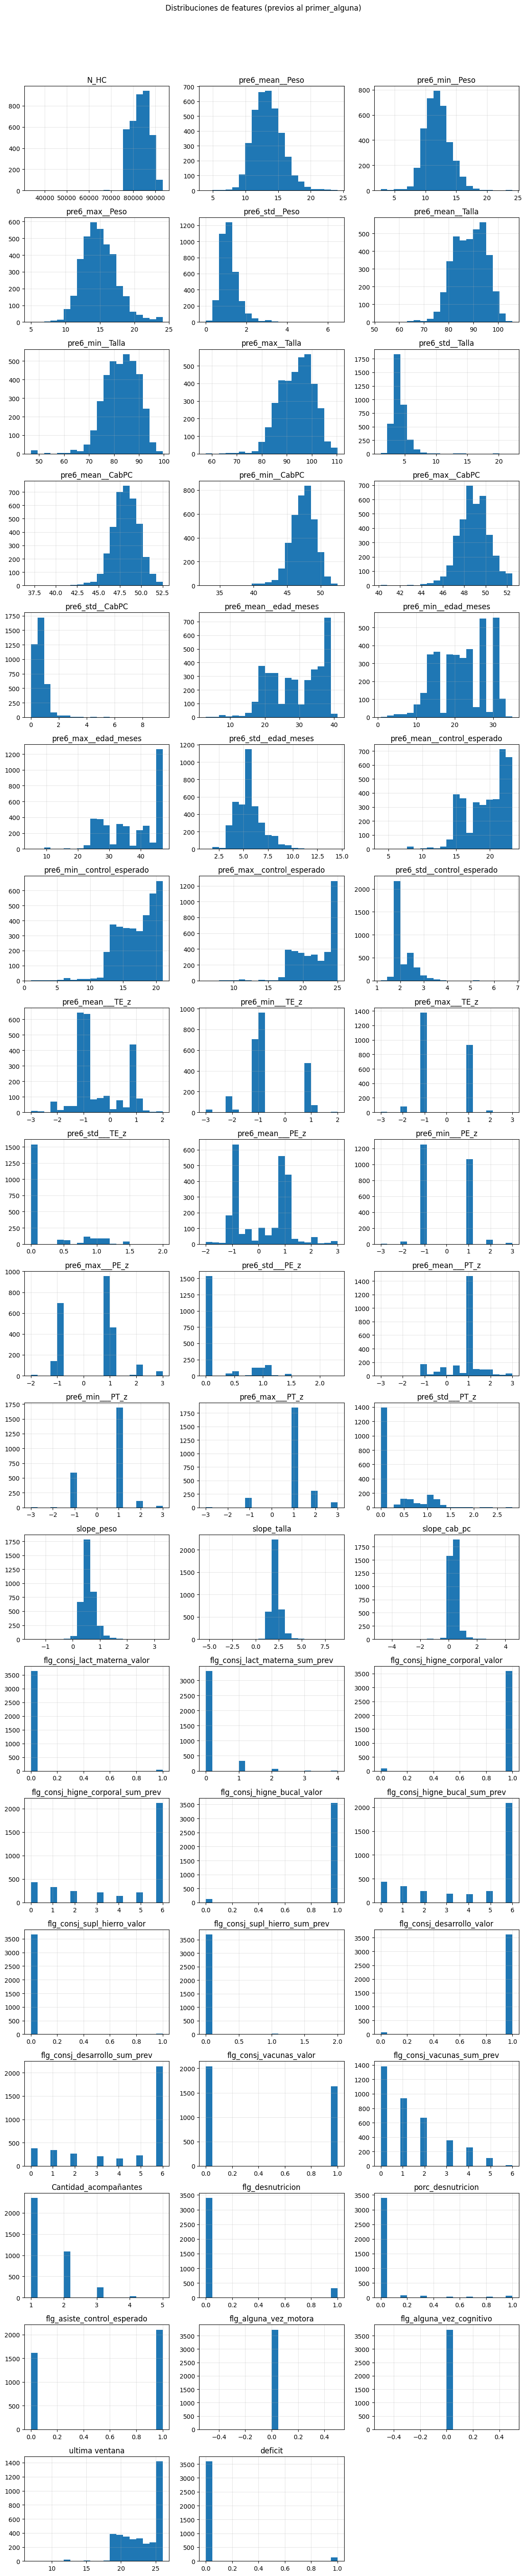

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_grid_hist(df, cols=None, ncols=3, bins=20, title=None):
    if cols is None:
        cols = df.select_dtypes(include='number').columns.tolist()
        cols = [c for c in cols if not c.endswith('_n__rows')]  # opcional: ocultar contador

    n = len(cols)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
    axes = np.array(axes).reshape(nrows, ncols)

    for i, c in enumerate(cols):
        r, k = divmod(i, ncols)
        s = pd.to_numeric(df[c], errors='coerce').dropna()
        axes[r, k].hist(s, bins=bins)
        axes[r, k].set_title(c)
        axes[r, k].grid(True, alpha=0.3)

    for j in range(n, nrows*ncols):
        r, k = divmod(j, ncols)
        axes[r, k].axis('off')

    if title: fig.suptitle(title, y=1.02)
    fig.tight_layout(); plt.show()

# Uso (sobre los pacientes con datos previos válidos):
plot_grid_hist(feats_prev6_mix, title='Distribuciones de features (previos al primer_alguna)')

In [ ]:
def plot_grid_hist_by_deficit(df, cols=None, tag='deficit', ncols=3, bins=20, title=None, density=False, alpha=0.6):
    if tag not in df.columns:
        raise ValueError(f"La columna de tag '{tag}' no existe en el DataFrame")

    # columnas a graficar
    if cols is None:
        cols = df.select_dtypes(include='number').columns.tolist()
    # quitar columnas que no queremos graficar
    cols = [c for c in cols if c not in {tag} and not c.endswith('_n__rows')]

    n = len(cols)
    if n == 0:
        raise ValueError("No hay columnas numéricas para graficar")

    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
    axes = np.array(axes).reshape(nrows, ncols)

    # máscaras de grupo
    m0 = df[tag] == 0
    m1 = df[tag] == 1

    for i, c in enumerate(cols):
        r, k = divmod(i, ncols)
        ax = axes[r, k]

        s0 = pd.to_numeric(df.loc[m0, c], errors='coerce').dropna()
        s1 = pd.to_numeric(df.loc[m1, c], errors='coerce').dropna()

        if len(s0) == 0 and len(s1) == 0:
            ax.set_title(c)
            ax.text(0.5, 0.5, "sin datos", ha='center', va='center', transform=ax.transAxes)
            ax.axis('off')
            continue

        # bins comunes para comparar manzanas con manzanas
        if isinstance(bins, int):
            data_all = np.concatenate([s0.values, s1.values]) if len(s0) and len(s1) else (s0.values if len(s0) else s1.values)
            bin_edges = np.histogram_bin_edges(data_all, bins=bins)
        else:
            bin_edges = bins  # si te pasan un array de edges

        # deficit=0 azul, deficit=1 rojo
        if len(s0):
            ax.hist(s0, bins=bin_edges, alpha=alpha, label='deficit=0', color='blue', density=density)
        if len(s1):
            ax.hist(s1, bins=bin_edges, alpha=alpha, label='deficit=1', color='red', density=density)

        ax.set_title(c)
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best', fontsize=8)

    # ejes vacíos
    for j in range(n, nrows*ncols):
        r, k = divmod(j, ncols)
        axes[r, k].axis('off')

    if title:
        fig.suptitle(title, y=1.02)
    fig.tight_layout()
    plt.show()

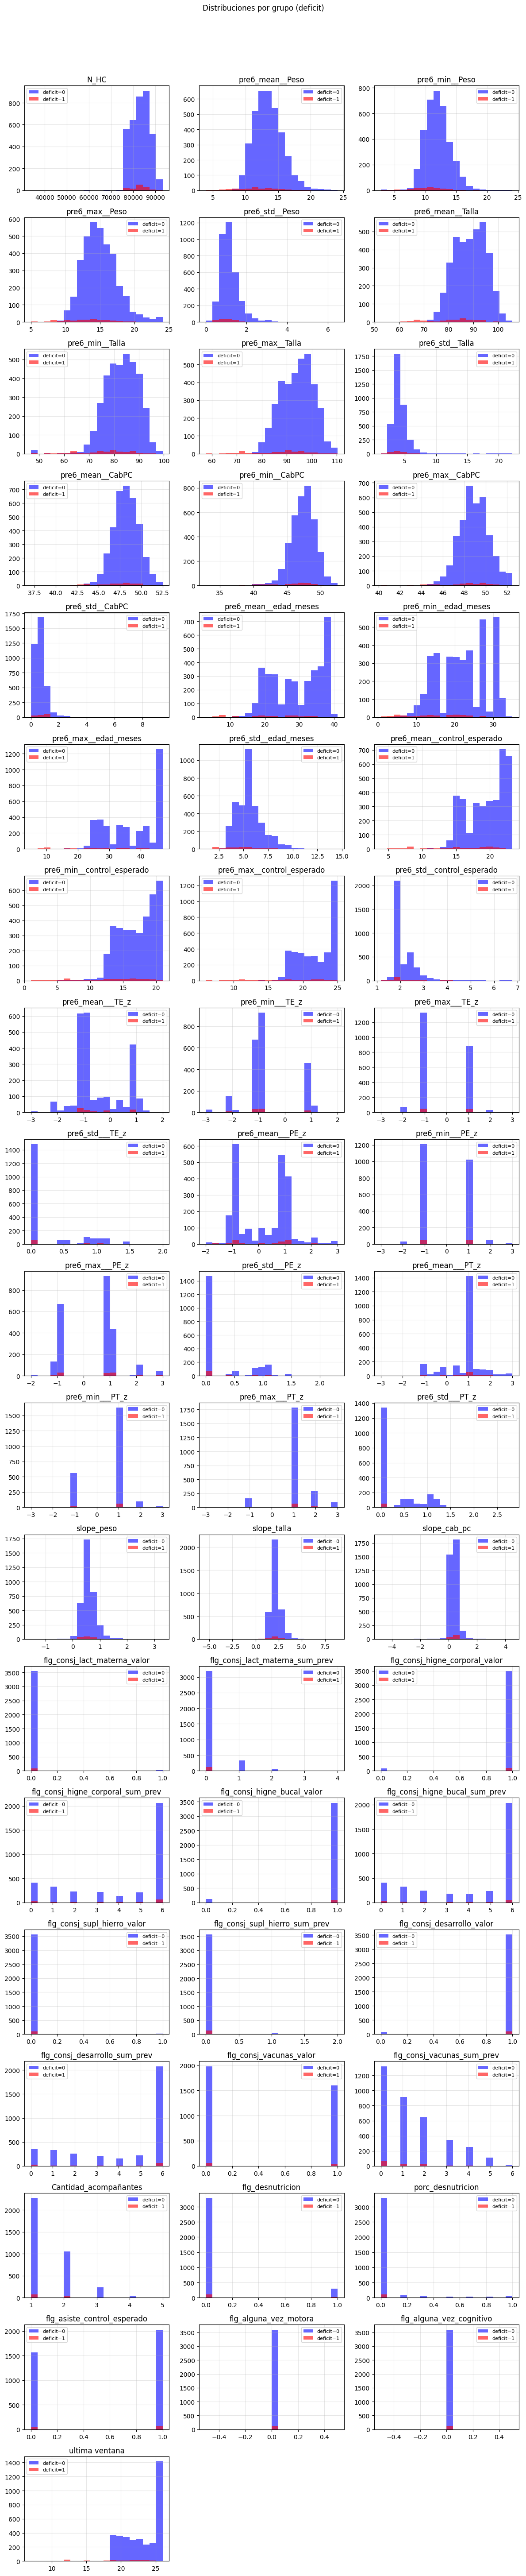

In [ ]:
# Filtra pacientes con ventanas válidas si quieres
#feats_plot = feats_prev6_mix[feats_prev6_mix['pre6_n__rows'] > 0].copy()
feats_plot = feats_prev6_mix[feats_prev6_mix['deficit'] == 0].copy()
feats_plot = feats_prev6_mix.copy()
#feats_plot = feats_prev6_mix[feats_prev6_mix['deficit'] == 1 ].copy()

plot_grid_hist_by_deficit(
    feats_plot,
    cols=None,                      # o una lista específica de columnas
    tag='deficit',
    ncols=3,
    bins=20,
    title='Distribuciones por grupo (deficit)',
    density=False,                  # True si prefieres áreas normalizadas
    alpha=0.6
)